In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [132]:
dosya_yolu = "/content/drive/MyDrive/YARIŞLAR.csv"  # Örnek dosya adı
import pandas as pd
df = pd.read_csv(dosya_yolu)
df.head()  # Veriyi görüntüle
df_1 = df

<ipython-input-132-3d8950c13b47>:3: DtypeWarning: Columns (8,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dosya_yolu)


In [133]:
"""dosya_yolu = "/content/drive/MyDrive/26.04.2025-İzmir-GunlukYarisSonuclari-TRTemiz.csv.csv"  # Örnek dosya adı
import pandas as pd
df = pd.read_csv(dosya_yolu)
df.head()  # Veriyi görüntüle
df_2 = df"""

'dosya_yolu = "/content/drive/MyDrive/26.04.2025-İzmir-GunlukYarisSonuclari-TRTemiz.csv.csv"  # Örnek dosya adı\nimport pandas as pd\ndf = pd.read_csv(dosya_yolu)\ndf.head()  # Veriyi görüntüle\ndf_2 = df'

In [134]:
dosya_yolu = "/content/drive/MyDrive/mart-Deneme.csv"  # Örnek dosya adı
import pandas as pd
df = pd.read_csv(dosya_yolu)
df.head()  # Veriyi görüntüle
df_2 = df

In [135]:
 #df_1'deki Tarih sütununu datetime formatına çevir
df_2["Tarih"] = pd.to_datetime(df_2["Tarih"], errors="coerce")

# Tarihleri dd.mm.yyyy formatında yazdır
df_2["Tarih"] = df_2["Tarih"].dt.strftime("%d.%m.%Y")


<ipython-input-135-ee684560238b>:2: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_2["Tarih"] = pd.to_datetime(df_2["Tarih"], errors="coerce")


In [136]:
#df_1'deki Tarih sütununu datetime formatına çevir
df_1["Tarih"] = pd.to_datetime(df_1["Tarih"], errors="coerce")

# Tarihleri dd.mm.yyyy formatında yazdır
df_1["Tarih"] = df_1["Tarih"].dt.strftime("%d.%m.%Y")

<ipython-input-136-41edf2667efd>:2: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_1["Tarih"] = pd.to_datetime(df_1["Tarih"], errors="coerce")


In [137]:
df_2 = df_2.rename(columns={"Koşu_y": "Koşu"})

In [138]:
#df_2.info()

In [139]:
#df_1

In [140]:
yarışlar_cat = pd.concat([df_1, df_2], ignore_index=True)

In [141]:
yarışlar_cat = yarışlar_cat.rename(columns={"At No": "Sıra"})

In [142]:
df = yarışlar_cat

In [143]:
yarışlar_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195663 entries, 0 to 195662
Data columns (total 33 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    5892 non-null    float64
 1   Sıra          195663 non-null  int64  
 2   At İsmi       195663 non-null  object 
 3   Yaş           195663 non-null  int64  
 4   Orijin(Baba)  195663 non-null  object 
 5   Orijin(Anne)  195663 non-null  object 
 6   Kilo          195663 non-null  float64
 7   Sahip Adı     195663 non-null  object 
 8   Antrenör Adı  5892 non-null    object 
 9   St            195663 non-null  int64  
 10  H             195663 non-null  float64
 11  Derece        195663 non-null  object 
 12  Detaylar      5788 non-null    object 
 13  Jokey         195663 non-null  object 
 14  Antrenör      195663 non-null  object 
 15  Tarih         5892 non-null    object 
 16  Koşu          5892 non-null    float64
 17  Şehir         195663 non-null  object 
 18  Pist

In [144]:
df["Tarih"] = df["Tarih"].astype("str")

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195663 entries, 5774 to 195544
Data columns (total 42 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Unnamed: 0          5892 non-null    float64       
 1   Sıra                195663 non-null  int64         
 2   At İsmi             195663 non-null  object        
 3   Yaş                 195663 non-null  int64         
 4   Orijin(Baba)        195663 non-null  object        
 5   Orijin(Anne)        195663 non-null  object        
 6   Kilo                195663 non-null  float64       
 7   Sahip Adı           195663 non-null  object        
 8   Antrenör Adı        5892 non-null    object        
 9   St                  195663 non-null  int64         
 10  H                   195663 non-null  float64       
 11  Derece              195663 non-null  object        
 12  Detaylar            5788 non-null    object        
 13  Jokey               195663 non-

In [145]:
import pandas as pd
import numpy as np

# Veri setini yükleme ve tarih formatına çevirme
df['Tarih'] = pd.to_datetime(df['Tarih'])

# Her at için ayrı bir grup oluşturup tarihe göre sıralama
df = df.sort_values(by=['At İsmi', 'Tarih'])

# 1. Son 5 yarışın ortalama sıralaması (Sıra sütunu kullanılarak)
df['son5_ortalama'] = df.groupby('At İsmi')['Sıra'].transform(lambda x: x.rolling(5, min_periods=1).mean())

# 2. Önceki yarıştaki sıralama
df['onceki_siralama'] = df.groupby('At İsmi')['Sıra'].shift(1)

# 3. Son yarıştan bu yana geçen gün sayısı
df['gun_farki'] = df.groupby('At İsmi')['Tarih'].diff().dt.days

# 4. Atın kariyerindeki ortalama sıralama (düzeltilmiş versiyon)
df['kariyer_ortalamasi'] = df.groupby('At İsmi')['Sıra'].expanding().mean().reset_index(level=0, drop=True)

# Eksik verileri temizleme
df.fillna({
    'onceki_siralama': df['Sıra'].median(),
    'gun_farki': df['gun_farki'].median(),
    'son5_ortalama': df['Sıra'].median()
}, inplace=True)

# Ek trend özellikleri
# Son 3 yarışta ilk 3'e girme oranı
df['son3_ilk3'] = df.groupby('At İsmi')['Sıra'].transform(
    lambda x: x.rolling(3, min_periods=1).apply(lambda y: (y <= 3).mean())
)

# Performans ivmesi (son 3 yarış ort. - önceki 3 yarış ort.)
df['performans_ivmesi'] = df.groupby('At İsmi')['Sıra'].transform(
    lambda x: x.rolling(3, min_periods=1).mean() - x.shift(3).rolling(3, min_periods=1).mean()
)

# Dinamik ağırlıklı ortalama (yakın yarışlar daha önemli)
df['agirlikli_ortalama'] = df.groupby('At İsmi').apply(
    lambda g: g['Sıra'].rolling(len(g), min_periods=1).apply(
        lambda x: np.average(x, weights=np.arange(1, len(x)+1))
    )
).reset_index(level=0, drop=True)

# Mevsimsel özellikler
df['ay'] = df['Tarih'].dt.month
df['mevsim'] = df['Tarih'].dt.quarter

<ipython-input-145-7ecf325f44f1>:5: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Tarih'] = pd.to_datetime(df['Tarih'])
<ipython-input-145-7ecf325f44f1>:41: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df['agirlikli_ortalama'] = df.groupby('At İsmi').apply(


In [149]:
#her bir jokey için skor belirleyip yarış setine koyalım
dosya_yolu = "/content/drive/My Drive/jokey_set.csv"
import pandas as pd
jokey = pd.read_csv(dosya_yolu)
jokey # Veriyi görüntüle

,Jokey,Koşu,1.,2.,3.,4.,5.,1.%,2.%,3.%,4.%,5.%,Jokey Kısaltması
0,HALİS KARATAŞ,26307.0,7156.0,5051.0,3919.0,2974.0,2189.0,27.0,19.0,15.0,11.0,8.0,H.KARATAŞ
1,MEHMET KAYA,24067.0,3681.0,3424.0,3132.0,2936.0,2575.0,15.0,14.0,13.0,12.0,11.0,M.KAYA
2,SÜLEYMAN AKDI,13136.0,3625.0,2508.0,1838.0,1443.0,977.0,28.0,19.0,14.0,11.0,7.0,S.AKDI
3,AHMET ÇELİK,17808.0,3193.0,2810.0,2579.0,2226.0,1786.0,18.0,16.0,14.0,12.0,10.0,A.ÇELİK
4,GÖKHAN KOCAKAYA,17087.0,3135.0,2679.0,2410.0,2111.0,1852.0,18.0,16.0,14.0,12.0,11.0,G.KOCAKAYA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1760,MUSTAFA TEKPETEK,15.0,0.0,1.0,0.0,1.0,3.0,0.0,7.0,0.0,7.0,20.0,M.TEKPETEK
1761,HELENE SOURBE,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,100.0,0.0,H.SOURBE
1762,ROCIO RELANO SIEIRA,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,R.R.SIEIRA
1763,TAYLOR KINGSLEY,2.0,0.0,1.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,T.KINGSLEY


In [150]:
jokey = jokey.dropna()

In [151]:
df[df["Jokey"].isin(jokey["Jokey"])!= True]

,Unnamed: 0,Sıra,At İsmi,Yaş,Orijin(Baba),Orijin(Anne),Kilo,Sahip Adı,Antrenör Adı,St,...,Koşu_y,son5_ortalama,onceki_siralama,gun_farki,kariyer_ortalamasi,son3_ilk3,performans_ivmesi,agirlikli_ortalama,ay,mevsim
5083,5218.0,14,ACARBAY,40,BİÇER,ANNEMİN KIZI,58.0,MÜSLÜM FİDAN,B.TANRIKULU,7,...,NaN,13.000000,12.0,0.0,13.000000,0.000000,NaN,13.333333,4.0,2.0
599,618.0,2,ADANALI AŞK,30,KALİMDOR,MOON AMOURE,60.0,ZAFER TURĞUL,B.TURGUL,2,...,NaN,2.000000,5.0,0.0,2.000000,1.000000,NaN,2.000000,4.0,2.0
1177,1214.0,3,AFŞINTAY,40,KURTÇABEY,BAHTIEVER,55.0,KAYA KAYA,S.AKCI,4,...,NaN,3.000000,5.0,0.0,3.000000,1.000000,NaN,3.000000,4.0,2.0
3623,3722.0,8,AKAYDIN,40,BATURŞAH,FLY SULTAN,58.0,LEVENT DEMİR,M.TEZEL,1,...,NaN,8.000000,5.0,0.0,8.000000,0.000000,NaN,8.000000,4.0,2.0
4581,4701.0,4,AKAYDIN,40,BATURŞAH,FLY SULTAN,56.0,LEVENT DEMİR,M.TEZEL,3,...,NaN,5.000000,3.0,0.0,5.000000,0.333333,NaN,4.333333,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4059,4168.0,1,İWOJİMA,50,ÖZGÜNHAN,OKİNAWA,54.0,HAKAN YÜCETÜRK,S.BEKTAŞ,3,...,NaN,2.000000,3.0,0.0,2.000000,1.000000,NaN,1.666667,4.0,2.0
3095,3185.0,10,İŞİN ASLI,90,AGRESIVO,DONT MAKE ME CRY,61.1,BEKTAŞ YILDIRIM,BEK.YILDIRIM,11,...,NaN,8.000000,6.0,0.0,8.000000,0.000000,NaN,8.666667,4.0,2.0
3616,3715.0,1,ŞAFAK ZAMANI,50,TURBO,KIRŞAFAK,60.5,HACI DURAN KOCA,F.ÇELTİK,7,...,NaN,6.500000,12.0,0.0,6.500000,0.500000,NaN,4.666667,4.0,2.0
1770,1832.0,4,ŞAHİN ALMHIMID,40,KARAKEMAL,GASTİN,55.0,AZAT KILIÇASLAN,FAH.CEYLAN,5,...,NaN,4.000000,5.0,0.0,4.000000,0.000000,NaN,4.000000,4.0,2.0


In [154]:
df["Tarih"]

,Tarih
5774,NaT
5775,NaT
5776,NaT
5777,NaT
5778,NaT
...,...
195540,NaT
195541,NaT
195542,NaT
195543,NaT


In [161]:
h["Yarış_ID"]

KeyError: 'Yarış_ID'

In [160]:
h = df[df["At İsmi"]=="THUNDER JEST" ]
h[h["Sıra"]==2]

,Unnamed: 0,Sıra,At İsmi,Yaş,Orijin(Baba),Orijin(Anne),Kilo,Sahip Adı,Antrenör Adı,St,...,Koşu_y,son5_ortalama,onceki_siralama,gun_farki,kariyer_ortalamasi,son3_ilk3,performans_ivmesi,agirlikli_ortalama,ay,mevsim
195546,1.0,2,THUNDER JEST,6,MENDIP,WHITESOX,58.5,OSMAN KOCABİÇAK,Y.AKKILIÇ,9,...,NaN,5.333333,5.0,0.0,5.333333,0.333333,NaN,4.166667,4.0,2.0
166086,NaN,2,THUNDER JEST,3,MENDIP,WHITESOX,58.0,OSMAN KOCABİÇAK,NaN,5,...,6.0,3.400000,3.0,0.0,4.428571,0.666667,-1.333333,3.607143,NaN,NaN
166093,NaN,2,THUNDER JEST,3,MENDIP,WHITESOX,61.0,OSMAN KOCABİÇAK,NaN,6,...,7.0,5.800000,5.0,0.0,5.000000,0.333333,-2.000000,5.019048,NaN,NaN
166094,NaN,2,THUNDER JEST,3,MENDIP,WHITESOX,56.0,OSMAN KOCABİÇAK,NaN,3,...,6.0,6.000000,2.0,0.0,4.800000,0.666667,-4.333333,4.641667,NaN,NaN
166116,NaN,2,THUNDER JEST,4,MENDIP,WHITESOX,57.0,OSMAN KOCABİÇAK,NaN,9,...,6.0,6.400000,8.0,0.0,5.243243,0.333333,0.000000,5.381223,NaN,NaN
166117,NaN,2,THUNDER JEST,4,MENDIP,WHITESOX,57.0,OSMAN KOCABİÇAK,NaN,9,...,6.0,5.000000,2.0,0.0,5.157895,0.666667,-3.333333,5.207827,NaN,NaN
166118,NaN,2,THUNDER JEST,4,MENDIP,WHITESOX,57.0,OSMAN KOCABİÇAK,NaN,9,...,6.0,4.400000,2.0,0.0,5.076923,1.000000,-5.000000,5.047436,NaN,NaN
166125,NaN,2,THUNDER JEST,5,MENDIP,WHITESOX,58.0,OSMAN KOCABİÇAK,NaN,14,...,8.0,6.000000,9.0,0.0,5.239130,0.333333,-0.333333,5.347826,NaN,NaN
166128,NaN,2,THUNDER JEST,5,MENDIP,WHITESOX,55.0,OSMAN KOCABİÇAK,NaN,11,...,4.0,4.400000,8.0,0.0,5.142857,0.666667,-2.666667,5.151020,NaN,NaN
166134,NaN,2,THUNDER JEST,5,MENDIP,WHITESOX,56.0,OSMAN KOCABİÇAK,NaN,7,...,3.0,8.400000,7.0,0.0,5.472727,0.333333,-1.000000,5.761688,NaN,NaN


In [162]:
import numpy as np

def hesapla_jokey_skoru(df):
    # Başarı skoru: yüzdeleri normalize edip ağırlık veriyoruz
    df["basari_skoru"] = (
        df["1.%"] * 0.5 +
        df["2.%"] * 0.3 +
        df["3.%"] * 0.15 +
        df["4.%"] * 0.04 +
        df["5.%"] * 0.01
    )

    # Güven: Logaritmik bir normalizasyon kullanıyoruz
    df["guven"] = df["Koşu"].apply(lambda x: np.log1p(x) / np.log1p(5000))

    # Jokey skoru: Başarı ve güvenin harmonik ortalamasına benzer bir çarpım
    df["jokey_skor"] = (df["basari_skoru"] * df["guven"]) ** 0.5

    return df

In [163]:
hesapla_jokey_skoru(jokey)

,Jokey,Koşu,1.,2.,3.,4.,5.,1.%,2.%,3.%,4.%,5.%,Jokey Kısaltması,basari_skoru,guven,jokey_skor
0,HALİS KARATAŞ,26307.0,7156.0,5051.0,3919.0,2974.0,2189.0,27.0,19.0,15.0,11.0,8.0,H.KARATAŞ,21.97,1.194923,5.123715
1,MEHMET KAYA,24067.0,3681.0,3424.0,3132.0,2936.0,2575.0,15.0,14.0,13.0,12.0,11.0,M.KAYA,14.24,1.184475,4.106936
2,SÜLEYMAN AKDI,13136.0,3625.0,2508.0,1838.0,1443.0,977.0,28.0,19.0,14.0,11.0,7.0,S.AKDI,22.31,1.113391,4.983949
3,AHMET ÇELİK,17808.0,3193.0,2810.0,2579.0,2226.0,1786.0,18.0,16.0,14.0,12.0,10.0,A.ÇELİK,16.48,1.149114,4.351713
4,GÖKHAN KOCAKAYA,17087.0,3135.0,2679.0,2410.0,2111.0,1852.0,18.0,16.0,14.0,12.0,11.0,G.KOCAKAYA,16.49,1.144262,4.343833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1760,MUSTAFA TEKPETEK,15.0,0.0,1.0,0.0,1.0,3.0,0.0,7.0,0.0,7.0,20.0,M.TEKPETEK,2.58,0.325521,0.916430
1761,HELENE SOURBE,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,100.0,0.0,H.SOURBE,4.00,0.081380,0.570544
1762,ROCIO RELANO SIEIRA,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,R.R.SIEIRA,7.50,0.128985,0.983557
1763,TAYLOR KINGSLEY,2.0,0.0,1.0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,0.0,T.KINGSLEY,15.00,0.128985,1.390960


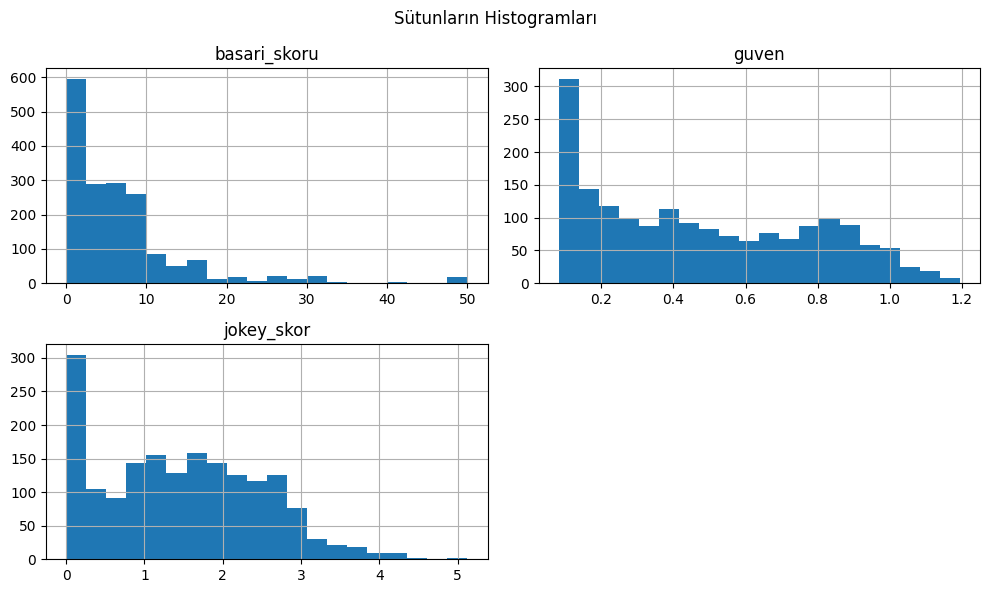

In [164]:
jokey[["basari_skoru", "guven", "jokey_skor"]].hist(bins=20, figsize=(10, 6))
plt.suptitle("Sütunların Histogramları")
plt.tight_layout()
plt.show()

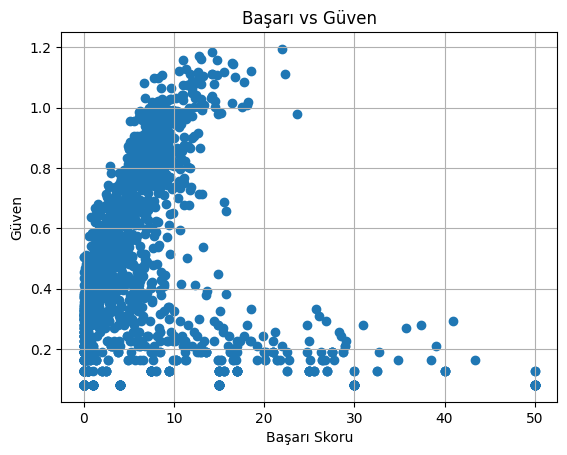

In [165]:
plt.scatter(jokey["basari_skoru"], jokey["guven"])
plt.xlabel("Başarı Skoru")
plt.ylabel("Güven")
plt.title("Başarı vs Güven")
plt.grid(True)
plt.show()

In [166]:
# jokey isimleri ve skoru lazım
jokey_id = jokey[["Jokey", "jokey_skor"]]


In [167]:
# Aynı isimde birden fazla jokey varsa, ortalama skorlarını alalım:
jokey_id_unique = jokey_id.groupby("Jokey")["jokey_skor"].mean().reset_index()

# Şimdi eşleştirme yapalım:
df["jokey_skoru"] = df["Jokey"].map(jokey_id_unique.set_index("Jokey")["jokey_skor"])

print(df.head())

      Unnamed: 0  Sıra    At İsmi  Yaş Orijin(Baba) Orijin(Anne)  Kilo  \
5774         NaN     5  A BİENTOT    2    LAST EXIT    LA CIGALE  57.0   
5775         NaN    15  A BİENTOT    3    LAST EXIT    LA CIGALE  58.0   
5776         NaN    14  A BİENTOT    3    LAST EXIT    LA CIGALE  58.0   
5777         NaN    12  A BİENTOT    3    LAST EXIT    LA CIGALE  52.0   
5778         NaN     6  A BİENTOT    3    LAST EXIT    LA CIGALE  58.0   

          Sahip Adı Antrenör Adı  St  ...  son5_ortalama onceki_siralama  \
5774  TRACY KAYAHAN          NaN   8  ...       5.000000             5.0   
5775  TRACY KAYAHAN          NaN  17  ...      10.000000             5.0   
5776  TRACY KAYAHAN          NaN  18  ...      11.333333            15.0   
5777  TRACY KAYAHAN          NaN  12  ...      11.500000            14.0   
5778  TRACY KAYAHAN          NaN  10  ...      10.400000            12.0   

     gun_farki kariyer_ortalamasi son3_ilk3 performans_ivmesi  \
5774       0.0           5.000000

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195663 entries, 5774 to 195544
Data columns (total 43 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Unnamed: 0          5892 non-null    float64       
 1   Sıra                195663 non-null  int64         
 2   At İsmi             195663 non-null  object        
 3   Yaş                 195663 non-null  int64         
 4   Orijin(Baba)        195663 non-null  object        
 5   Orijin(Anne)        195663 non-null  object        
 6   Kilo                195663 non-null  float64       
 7   Sahip Adı           195663 non-null  object        
 8   Antrenör Adı        5892 non-null    object        
 9   St                  195663 non-null  int64         
 10  H                   195663 non-null  float64       
 11  Derece              195663 non-null  object        
 12  Detaylar            5788 non-null    object        
 13  Jokey               195663 non-

In [169]:
dosya_yolu = "/content/drive/MyDrive/sahip_set.csv"  # Örnek dosya adı
import pandas as pd
sahip = pd.read_csv(dosya_yolu)
sahip.head()  # Veriyi görüntüle

,Sahip,Koşu,1.,2.,3.,4.,5.,1.%,2.%,3.%,4.%,5.%
0,DENİZ KURTEL,5373.0,811.0,722.0,636.0,624.0,467.0,15.0,13.0,12.0,12.0,9.0
1,REMAZAN KAYA,9096.0,654.0,701.0,793.0,845.0,927.0,7.0,8.0,9.0,9.0,10.0
2,N.AREK KUYUMCİYAN,3430.0,551.0,497.0,472.0,401.0,378.0,16.0,14.0,14.0,12.0,11.0
3,NURBİYE GÜLERCE,2682.0,513.0,388.0,355.0,329.0,263.0,19.0,14.0,13.0,12.0,10.0
4,KEMAL KURT,4011.0,512.0,445.0,467.0,464.0,396.0,13.0,11.0,12.0,12.0,10.0


In [170]:
sahip = sahip.dropna()

In [171]:
df[df["Sahip Adı"].isin(sahip["Sahip"])!= True]

,Unnamed: 0,Sıra,At İsmi,Yaş,Orijin(Baba),Orijin(Anne),Kilo,Sahip Adı,Antrenör Adı,St,...,son5_ortalama,onceki_siralama,gun_farki,kariyer_ortalamasi,son3_ilk3,performans_ivmesi,agirlikli_ortalama,ay,mevsim,jokey_skoru
18962,NaN,13,ASİ TAHA,4,DOĞANGÜN,KAR GÜZELİ,52.400000,MEHMET CANLIKA,NaN,9,...,10.0,7.0,0.0,6.692308,0.000000,-1.666667,6.855128,NaN,NaN,2.624584
108536,NaN,4,LION OF HONOUR,3,BODEMEISTER,STELLINA,58.300000,RAMAZAN YILMAZ,NaN,12,...,4.0,2.0,0.0,4.000000,0.333333,-2.666667,3.600000,NaN,NaN,0.000000
108537,NaN,5,LION OF HONOUR,3,BODEMEISTER,STELLINA,54.400000,RAMAZAN YILMAZ,NaN,5,...,4.2,4.0,0.0,4.200000,0.333333,-1.333333,4.066667,NaN,NaN,3.356649
108538,NaN,2,LION OF HONOUR,3,BODEMEISTER,STELLINA,58.000000,RAMAZAN YILMAZ,NaN,1,...,3.4,5.0,0.0,3.833333,0.333333,-0.333333,3.476190,NaN,NaN,3.717405
108539,NaN,4,LION OF HONOUR,3,BODEMEISTER,STELLINA,55.300000,RAMAZAN YILMAZ,NaN,4,...,3.4,2.0,0.0,3.857143,0.333333,0.333333,3.607143,NaN,NaN,3.071857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195538,NaN,2,ŞİRİNMİŞİRİN,8,UÇANBEY,KINALIGELİN,58.000000,MEHMET CANLIKA,NaN,5,...,3.4,2.0,0.0,4.514286,0.666667,-0.333333,4.298413,NaN,NaN,2.928035
195539,NaN,2,ŞİRİNMİŞİRİN,8,UÇANBEY,KINALIGELİN,58.000000,MEHMET CANLIKA,NaN,5,...,3.4,2.0,0.0,4.444444,1.000000,-2.333333,4.174174,NaN,NaN,3.737722
195540,NaN,3,ŞİRİNMİŞİRİN,8,UÇANBEY,KINALIGELİN,57.333333,MEHMET CANLIKA,NaN,11,...,3.0,2.0,0.0,4.405405,1.000000,-2.000000,4.112376,NaN,NaN,3.748531
195541,NaN,5,ŞİRİNMİŞİRİN,8,UÇANBEY,KINALIGELİN,56.950000,MEHMET CANLIKA,NaN,10,...,2.8,3.0,0.0,4.421053,0.666667,0.000000,4.157895,NaN,NaN,2.463632


In [172]:
farkli_sahip_adı = df[~df["Sahip Adı"].isin(sahip["Sahip"])]["Sahip Adı"].unique()

# Sonuçları yazdıralım
print(farkli_sahip_adı)

['MEHMET CANLIKA ' 'RAMAZAN YILMAZ ' 'FİDAN GÜVEN ']


In [173]:
df['Sahip Adı'] = df['Sahip Adı'].str.strip()

In [174]:
df[df["Sahip Adı"].isin(sahip["Sahip"])!= True]

,Unnamed: 0,Sıra,At İsmi,Yaş,Orijin(Baba),Orijin(Anne),Kilo,Sahip Adı,Antrenör Adı,St,...,son5_ortalama,onceki_siralama,gun_farki,kariyer_ortalamasi,son3_ilk3,performans_ivmesi,agirlikli_ortalama,ay,mevsim,jokey_skoru


In [175]:
import numpy as np

def hesapla_sahip_skoru(df):
    # Başarı skoru: yüzdeleri normalize edip ağırlık veriyoruz
    df["basari_skoru"] = (
        df["1.%"] * 0.5 +
        df["2.%"] * 0.3 +
        df["3.%"] * 0.15 +
        df["4.%"] * 0.04 +
        df["5.%"] * 0.01
    )

    # Güven: Logaritmik bir normalizasyon kullanıyoruz
    df["guven"] = df["Koşu"].apply(lambda x: np.log1p(x) / np.log1p(5000))

    # Jokey skoru: Başarı ve güvenin harmonik ortalamasına benzer bir çarpım
    df["sahip_skor"] = (df["basari_skoru"] * df["guven"]) ** 0.5

    return df

In [176]:
hesapla_sahip_skoru(sahip)

,Sahip,Koşu,1.,2.,3.,4.,5.,1.%,2.%,3.%,4.%,5.%,basari_skoru,guven,sahip_skor
0,DENİZ KURTEL,5373.0,811.0,722.0,636.0,624.0,467.0,15.0,13.0,12.0,12.0,9.0,13.77,1.008446,3.726432
1,REMAZAN KAYA,9096.0,654.0,701.0,793.0,845.0,927.0,7.0,8.0,9.0,9.0,10.0,7.71,1.070245,2.872558
2,N.AREK KUYUMCİYAN,3430.0,551.0,497.0,472.0,401.0,378.0,16.0,14.0,14.0,12.0,11.0,14.89,0.955763,3.772440
3,NURBİYE GÜLERCE,2682.0,513.0,388.0,355.0,329.0,263.0,19.0,14.0,13.0,12.0,10.0,16.23,0.926891,3.878586
4,KEMAL KURT,4011.0,512.0,445.0,467.0,464.0,396.0,13.0,11.0,12.0,12.0,10.0,12.18,0.974130,3.444546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7294,MEHMET AKBAŞ,1.0,1.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,50.00,0.081380,2.017179
7295,HASAN ALANOĞLU,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,15.00,0.081380,1.104854
7296,HALİM DEMİRKAPU,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,100.0,1.00,0.081380,0.285272
7297,BERKAY UĞUR ÇETİNEL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.081380,0.000000


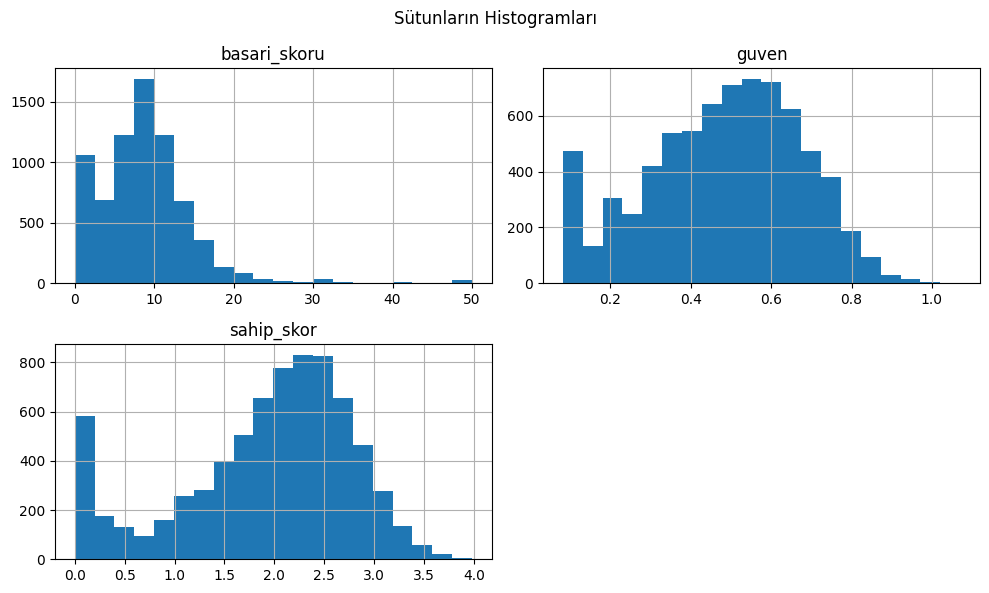

In [177]:
sahip[["basari_skoru", "guven", "sahip_skor"]].hist(bins=20, figsize=(10, 6))
plt.suptitle("Sütunların Histogramları")
plt.tight_layout()
plt.show()

In [178]:
sahip_id = sahip[["Sahip", "sahip_skor"]]

In [179]:
# Aynı isimde birden fazla jokey varsa, ortalama skorlarını alalım:
sahip_id_unique = sahip_id.groupby("Sahip")["sahip_skor"].mean().reset_index()

# Şimdi eşleştirme yapalım:
df["sahip_skoru"] = df["Sahip Adı"].map(sahip_id_unique.set_index("Sahip")["sahip_skor"])

print(df.head())

      Unnamed: 0  Sıra    At İsmi  Yaş Orijin(Baba) Orijin(Anne)  Kilo  \
5774         NaN     5  A BİENTOT    2    LAST EXIT    LA CIGALE  57.0   
5775         NaN    15  A BİENTOT    3    LAST EXIT    LA CIGALE  58.0   
5776         NaN    14  A BİENTOT    3    LAST EXIT    LA CIGALE  58.0   
5777         NaN    12  A BİENTOT    3    LAST EXIT    LA CIGALE  52.0   
5778         NaN     6  A BİENTOT    3    LAST EXIT    LA CIGALE  58.0   

          Sahip Adı Antrenör Adı  St  ...  onceki_siralama gun_farki  \
5774  TRACY KAYAHAN          NaN   8  ...              5.0       0.0   
5775  TRACY KAYAHAN          NaN  17  ...              5.0       0.0   
5776  TRACY KAYAHAN          NaN  18  ...             15.0       0.0   
5777  TRACY KAYAHAN          NaN  12  ...             14.0       0.0   
5778  TRACY KAYAHAN          NaN  10  ...             12.0       0.0   

     kariyer_ortalamasi son3_ilk3 performans_ivmesi agirlikli_ortalama  ay  \
5774           5.000000       0.0           

In [180]:
dosya_yolu = "/content/drive/My Drive/antrenor_set.csv"  # Örnek dosya adı
import pandas as pd
antrenor = pd.read_csv(dosya_yolu)
antrenor.head()  # Veriyi görüntüle

,Antrenör,Koşu,1.,2.,3.,4.,5.,1.%,2.%,3.%,4.%,5.%,Antrenor Kısaltması
0,İBRAHİM BEKİROĞULLARI,5345.0,1053.0,830.0,655.0,605.0,525.0,20.0,16.0,12.0,11.0,10.0,İ.BEKİROĞULLARI
1,KAZIM YILDIZ,6865.0,590.0,603.0,575.0,670.0,693.0,9.0,9.0,8.0,10.0,10.0,K.YILDIZ
2,ŞEFİK AYDEMİR,3971.0,574.0,464.0,447.0,435.0,419.0,14.0,12.0,11.0,11.0,11.0,Ş.AYDEMİR
3,SERDAR VEYSEL KAYA,5989.0,570.0,603.0,560.0,570.0,564.0,10.0,10.0,9.0,10.0,9.0,S.V.KAYA
4,ADEM GÜVEN,4729.0,525.0,508.0,552.0,475.0,475.0,11.0,11.0,12.0,10.0,10.0,A.GÜVEN


In [181]:
antrenor = antrenor.dropna()

In [182]:
df[df["Antrenör"].isin(antrenor["Antrenör"])!= True]

,Unnamed: 0,Sıra,At İsmi,Yaş,Orijin(Baba),Orijin(Anne),Kilo,Sahip Adı,Antrenör Adı,St,...,onceki_siralama,gun_farki,kariyer_ortalamasi,son3_ilk3,performans_ivmesi,agirlikli_ortalama,ay,mevsim,jokey_skoru,sahip_skoru
439,456.0,8,BİLGESULTAN,30,ORÇUN,SEKRETER,55.9,ELİF CAN TOPÇU,NEJ.TURAN,11,...,5.0,0.0,8.0,0.0,NaN,8.000000,4.0,2.0,2.867808,1.558916
538,557.0,7,ESENYIL,30,UÇANBEY,ALTINSARISI,57.0,CEMİLE AYDIN,NEJ.TURAN,9,...,5.0,0.0,7.0,0.0,NaN,7.000000,4.0,2.0,2.703305,0.000000
74978,NaN,6,GÖKEFE,3,SARRAF,IŞKIN,57.0,ENVER TOYDEMİR,NaN,13,...,5.0,0.0,6.0,0.0,NaN,6.000000,NaN,NaN,2.743349,2.432609
534,553.0,3,KADİRŞİNAS,30,ORÇUN,İNCİÇİÇEĞİ,55.0,ELİF CAN TOPÇU,NEJ.TURAN,14,...,5.0,0.0,3.0,1.0,NaN,3.000000,4.0,2.0,2.645611,1.558916
304,320.0,8,KARA KORSAN,50,ÖZHABER,CENNET KUŞU,57.0,MAZLUM TURAN,NEJ.TURAN,8,...,5.0,0.0,8.0,0.0,NaN,8.000000,4.0,2.0,3.586946,2.392757
782,807.0,8,NAMSAL,40,GÜRSU,SARDES,58.0,ŞABAN KARAMAN,E.ŞAHİNKAYA,7,...,5.0,0.0,8.0,0.0,NaN,8.000000,4.0,2.0,4.351713,3.167551
4522,4640.0,1,NAMSAL,40,GÜRSU,SARDES,60.0,ŞABAN KARAMAN,E.ŞAHİNKAYA,5,...,8.0,0.0,4.5,0.5,NaN,3.333333,4.0,2.0,4.351713,3.167551
541,560.0,10,OVACIKLI KIZ,30,BABA MEVLÜT,SUĞLA,55.6,YASEMİN TOPÇU,NEJ.TURAN,6,...,5.0,0.0,10.0,0.0,NaN,10.000000,4.0,2.0,2.867808,1.067808


In [183]:
df.loc[df["Antrenör"] == "BÜLENT TOYDEMİR", "Antrenör"] = "MEHMET DEMİROL"

In [184]:
import numpy as np

def hesapla_antrenör_skoru(df):
    # Başarı skoru: yüzdeleri normalize edip ağırlık veriyoruz
    df["basari_skoru"] = (
        df["1.%"] * 0.5 +
        df["2.%"] * 0.3 +
        df["3.%"] * 0.15 +
        df["4.%"] * 0.04 +
        df["5.%"] * 0.01
    )

    # Güven: Logaritmik bir normalizasyon kullanıyoruz
    df["guven"] = df["Koşu"].apply(lambda x: np.log1p(x) / np.log1p(3000))

    # antrenor skoru: Başarı ve güvenin harmonik ortalamasına benzer bir çarpım
    df["antrenor_skor"] = (df["basari_skoru"] * df["guven"]) ** 0.5

    return df

In [185]:
hesapla_antrenör_skoru(antrenor)

,Antrenör,Koşu,1.,2.,3.,4.,5.,1.%,2.%,3.%,4.%,5.%,Antrenor Kısaltması,basari_skoru,guven,antrenor_skor
0,İBRAHİM BEKİROĞULLARI,5345.0,1053.0,830.0,655.0,605.0,525.0,20.0,16.0,12.0,11.0,10.0,İ.BEKİROĞULLARI,17.14,1.072115,4.286730
1,KAZIM YILDIZ,6865.0,590.0,603.0,575.0,670.0,693.0,9.0,9.0,8.0,10.0,10.0,K.YILDIZ,8.90,1.103368,3.133684
2,ŞEFİK AYDEMİR,3971.0,574.0,464.0,447.0,435.0,419.0,14.0,12.0,11.0,11.0,11.0,Ş.AYDEMİR,12.80,1.035011,3.639800
3,SERDAR VEYSEL KAYA,5989.0,570.0,603.0,560.0,570.0,564.0,10.0,10.0,9.0,10.0,9.0,S.V.KAYA,9.84,1.086321,3.269464
4,ADEM GÜVEN,4729.0,525.0,508.0,552.0,475.0,475.0,11.0,11.0,12.0,10.0,10.0,A.GÜVEN,11.10,1.056825,3.425019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,ERSAN ÇALIK,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,E.ÇALIK,0.00,0.086571,0.000000
1788,KAZIM OZAN ÖZER,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,K.O.ÖZER,15.00,0.086571,1.139545
1789,ÖZGÜR UMUT ÇİL,4.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,25.0,25.0,25.0,Ö.U.ÇİL,5.00,0.201011,1.002525
1790,GÜNER ÖZER,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,G.ÖZER,2.55,0.243035,0.787236


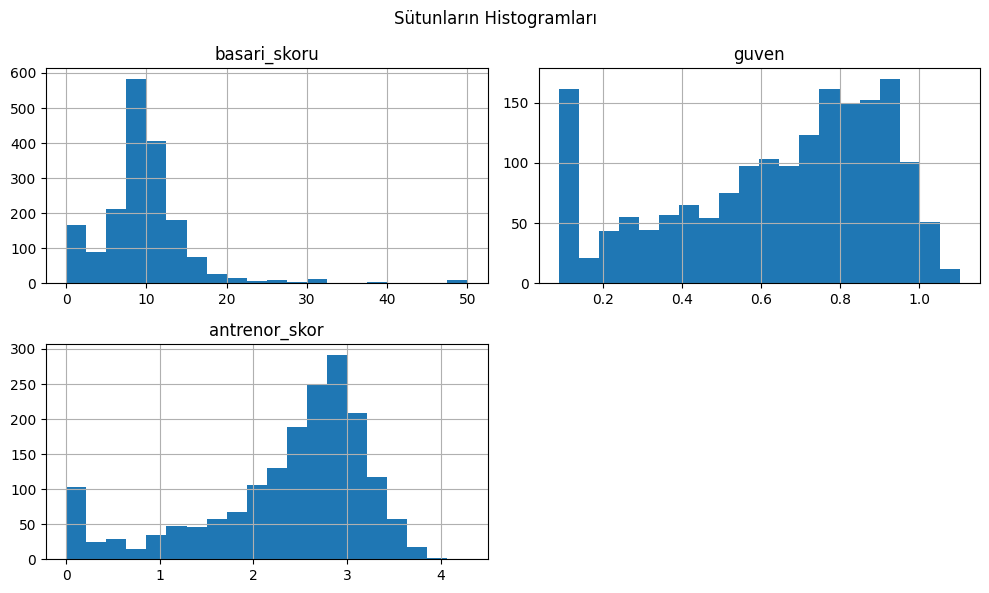

In [186]:
antrenor[["basari_skoru", "guven", "antrenor_skor"]].hist(bins=20, figsize=(10, 6))
plt.suptitle("Sütunların Histogramları")
plt.tight_layout()
plt.show()

In [187]:
antrenor_id = antrenor[["Antrenör", "antrenor_skor"]]

In [188]:
# Aynı isimde birden fazla jokey varsa, ortalama skorlarını alalım:
antrenor_id_unique = antrenor_id.groupby("Antrenör")["antrenor_skor"].mean().reset_index()

# Şimdi eşleştirme yapalım:
df["antrenor_skoru"] = df["Antrenör"].map(antrenor_id_unique.set_index("Antrenör")["antrenor_skor"])

df.info

<bound method DataFrame.info of         Unnamed: 0  Sıra          At İsmi  Yaş Orijin(Baba)  Orijin(Anne)  \
5774           NaN     5        A BİENTOT    2    LAST EXIT     LA CIGALE   
5775           NaN    15        A BİENTOT    3    LAST EXIT     LA CIGALE   
5776           NaN    14        A BİENTOT    3    LAST EXIT     LA CIGALE   
5777           NaN    12        A BİENTOT    3    LAST EXIT     LA CIGALE   
5778           NaN     6        A BİENTOT    3    LAST EXIT     LA CIGALE   
...            ...   ...              ...  ...          ...           ...   
195540         NaN     3     ŞİRİNMİŞİRİN    8      UÇANBEY   KINALIGELİN   
195541         NaN     5     ŞİRİNMİŞİRİN    8      UÇANBEY   KINALIGELİN   
195542         NaN     7     ŞİRİNMİŞİRİN    8      UÇANBEY   KINALIGELİN   
195543         NaN     7  ŞİRİNYER PINARI    4      ANATOLY  VICTORY KISS   
195544         NaN     8  ŞİRİNYER PINARI    4      ANATOLY  VICTORY KISS   

             Kilo        Sahip Adı Antrenör Adı  St  ...  gun_farki  \
5774    57.000000    TRACY KAYAHAN          NaN   8  ...        0.0   
5775    58.000000    TRACY KAYAHAN          NaN  17  ...        0.0   
5776    58.000000    TRACY KAYAHAN          NaN  18  ...        0.0   
5777    52.000000    TRACY KAYAHAN          NaN  12  ...        0.0   
5778    58.000000    TRACY KAYAHAN          NaN  10  ...        0.0   
...           ...              ...          ...  ..  ...        ...   
195540  57.333333   MEHMET CANLIKA          NaN  11  ...        0.0   
195541  56.950000   MEHMET CANLIKA          NaN  10  ...        0.0   
195542  56.500000   MEHMET CANLIKA          NaN   1  ...        0.0   
195543  50.000000  İSMAİL HADİOĞLU          NaN   3  ...        0.0   
195544  50.200000  İSMAİL HADİOĞLU          NaN   2  ...        0.0   

       kariyer_ortalamasi son3_ilk3 performans_ivmesi agirlikli_ortalama  ay  \
5774             5.000000  0.000000               NaN           5.000000 NaN   
5775            10.000000  0.000000               NaN          11.666667 NaN   
5776            11.333333  0.000000               NaN          12.833333 NaN   
5777            11.500000  0.000000          8.666667          12.500000 NaN   
5778            10.400000  0.000000          0.666667          10.333333 NaN   
...                   ...       ...               ...                ...  ..   
195540           4.405405  1.000000         -2.000000           4.112376 NaN   
195541           4.421053  0.666667          0.000000           4.157895 NaN   
195542           4.487179  0.333333          3.000000           4.300000 NaN   
195543           7.000000  0.000000               NaN           7.000000 NaN   
195544           7.500000  0.000000               NaN           7.666667 NaN   

        mevsim jokey_skoru sahip_skoru  antrenor_skoru  
5774       NaN    3.432936    2.937161        3.534031  
5775       NaN    2.562359    2.937161        3.534031  
5776       NaN    3.017831    2.937161        3.534031  
5777       NaN    1.734865    2.937161        3.534031  
5778       NaN    3.017831    2.937161        3.534031  
...        ...         ...         ...             ...  
195540     NaN    3.748531    2.279720        3.000202  
195541     NaN    2.463632    2.279720        3.000202  
195542     NaN    3.813987    2.279720        3.000202  
195543     NaN    2.251874    3.287695        3.186119  
195544     NaN    2.251874    3.287695        3.186119  

[195663 rows x 45 columns]>

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195663 entries, 5774 to 195544
Data columns (total 45 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Unnamed: 0          5892 non-null    float64       
 1   Sıra                195663 non-null  int64         
 2   At İsmi             195663 non-null  object        
 3   Yaş                 195663 non-null  int64         
 4   Orijin(Baba)        195663 non-null  object        
 5   Orijin(Anne)        195663 non-null  object        
 6   Kilo                195663 non-null  float64       
 7   Sahip Adı           195663 non-null  object        
 8   Antrenör Adı        5892 non-null    object        
 9   St                  195663 non-null  int64         
 10  H                   195663 non-null  float64       
 11  Derece              195663 non-null  object        
 12  Detaylar            5788 non-null    object        
 13  Jokey               195663 non-

In [190]:
dosya_yolu = "/content/drive/My Drive/kisrak_set.csv"  # Örnek dosya adı
import pandas as pd
kisrak = pd.read_csv(dosya_yolu)
kisrak.head()  # Veriyi görüntüle

,Kısrak,Ülke Adı,Irk Adı,Koşan Tay Adet,Koşu,1.,2.,3.,4.,5.,1.%,2.%,3.%,4.%,5.%,Kazanç
0,MEBRUKE.52,TÜRKİYE,Arap,14.0,975.0,153.0,91.0,90.0,92.0,88.0,16.0,9.0,9.0,9.0,9.0,",00"
1,NEAME.39,TÜRKİYE,Arap,11.0,603.0,134.0,98.0,82.0,82.0,53.0,22.0,16.0,14.0,14.0,9.0,"5.125.581,50"
2,KEMİYETÜLIRAK.26,TÜRKİYE,Arap,12.0,644.0,129.0,85.0,68.0,69.0,50.0,20.0,13.0,11.0,11.0,8.0,"383.749,00"
3,MENCULE.11,TÜRKİYE,Arap,13.0,806.0,129.0,106.0,92.0,95.0,90.0,16.0,13.0,11.0,12.0,11.0,",00"
4,SEYYARE.55,TÜRKİYE,Arap,14.0,747.0,128.0,93.0,72.0,75.0,64.0,17.0,12.0,10.0,10.0,9.0,"11.459.860,00"


In [191]:
kisrak = kisrak.dropna()

In [192]:
# "Daha Fazla Sonuç Göster" ifadesini içeren satırları silme
kisrak = kisrak[~kisrak["Kısrak"].str.contains("Daha Fazla Sonuç Göster", case=False, na=False)]

In [193]:
import pandas as pd
from io import StringIO

# Veriyi string olarak tanımla (senin verine uygun şekilde düzenledim)
data = """Kısrak,Ülke Adı,Irk Adı,Koşan Tay Adet,Koşu,1.,2.,3.,4.,5.,1.%,2.%,3.%,4.%,5.%,"Kazanç"
ZORBİKE,TÜRKİYE,İngiliz,6,25,1,1,0,1,2,4,4,0,4,8,"69.622,50"
YÜNLÜCELİ KIZ,TÜRKİYE,İngiliz,3,60,5,12,6,7,4,8,20,10,12,7,"1.498.273,75"
WHITESOX,TÜRKİYE,İngiliz,2,90,16,12,7,14,10,18,13,8,16,11,"3.962.618,75"
TRACE,TÜRKİYE,İngiliz,5,75,16,12,8,10,10,21,16,11,13,13,"5.542.727,50"
FUSS CAT,TÜRKİYE,İngiliz,7,85,16,10,9,11,9,19,12,11,13,11,"1.774.912,50"
MARANA TAU,TÜRKİYE,İngiliz,2,75,17,9,7,11,3,23,12,9,15,4,"3.196.345,00"
MELENDİZLİ,TÜRKİYE,İngiliz,6,64,5,5,5,7,5,8,8,8,11,8,"705.125,00"
AYHATUNKIZI,TÜRKİYE,Arap,2,59,7,6,8,3,4,12,10,14,5,7,"821.271,25"
AL JAWHARA,TÜRKİYE,İngiliz,3,59,7,8,12,8,6,12,14,20,14,10,"5.055.505,00"
CANCAN KATY (GB),İNGİLTERE,İngiliz,4,63,5,7,7,4,6,8,11,11,6,10,"570.931,88"
SHE MOLF,TÜRKİYE,İngiliz,4,77,16,16,5,14,5,21,21,6,18,6,"3.307.692,50"
CUMULUS (GB),İNGİLTERE,İngiliz,4,75,17,12,7,8,8,23,16,9,11,11,"6.733.808,75"
AVIL,TÜRKİYE,İngiliz,2,61,5,6,5,8,2,8,10,8,13,3,"714.150,00"
ESRALI,TÜRKİYE,Arap,3,61,5,4,4,5,8,8,7,7,8,13,"778.607,50"
SPRING A LATCH (USA),ABD,İngiliz,4,63,5,8,14,11,4,8,13,22,17,6,"1.706.928,13"
LATIGO BAY,TÜRKİYE,İngiliz,7,89,16,9,16,5,7,18,10,18,6,8,"2.036.031,25"
ÇİÇEKLERİN KIZI,TÜRKİYE,İngiliz,2,74,16,11,15,7,6,22,15,20,9,8,"1.493.526,25"
PRENSES ZEYNA,TÜRKİYE,İngiliz,4,75,16,9,9,3,7,21,12,12,4,9,"3.743.292,50"
DAME SHANAKILL (USA),ABD,İngiliz,3,63,5,10,8,7,10,8,16,13,11,16,"1.576.732,50"
MELIA,TÜRKİYE,İngiliz,5,64,5,3,4,9,7,8,5,6,14,11,"732.687,50"
SUMAVİSİ,TÜRKİYE,Arap,2,59,7,7,5,2,3,12,12,8,3,5,"888.312,50"
MILLIONDOLLAR BABY,TÜRKİYE,İngiliz,3,49,3,5,4,1,5,6,10,8,2,10,"977.435,00"
GALATASULTANI,TÜRKİYE,İngiliz,4,61,5,2,9,8,10,8,3,15,13,16,"959.075,00"
MISSY FRANKLIN,TÜRKİYE,İngiliz,4,55,7,7,6,7,5,13,13,11,13,9,"1.581.652,50"
ŞEMMAME,TÜRKİYE,İngiliz,4,63,5,7,8,9,9,8,11,13,14,14,"3.194.880,00"
LADY OSCAR (USA),ABD,İngiliz,5,95,16,4,7,8,7,17,4,7,8,7,"1.885.420,00"
DOST ELİ,TÜRKİYE,Arap,3,87,16,21,5,8,10,18,24,6,9,11,"6.736.766,25"
KATUŞA,TÜRKİYE,İngiliz,3,54,7,6,10,7,5,13,11,19,13,9,"2.153.748,75"
BELLA STEPS,TÜRKİYE,İngiliz,4,85,16,16,8,11,6,19,19,9,13,7,"4.517.986,25"
AMAZONAS,TÜRKİYE,İngiliz,6,65,5,5,3,8,15,8,8,5,12,23,"749.331,25"
ARWA,TÜRKİYE,İngiliz,5,60,7,4,2,11,10,12,7,3,18,17,"3.918.745,00"
WHITE HEART,TÜRKİYE,İngiliz,3,57,7,7,6,5,6,12,12,11,9,11,"1.850.628,75"
BERRIYMA (FR),FRANSA,İngiliz,7,95,16,10,13,9,14,17,11,14,9,15,"3.672.586,25"
NEW VISION (GB),İNGİLTERE,İngiliz,4,30,1,2,3,5,3,3,7,10,17,10,"814.903,75"
SİBEL SU,TÜRKİYE,İngiliz,3,66,5,15,11,12,6,8,23,17,18,9,"3.381.818,75"
LASTING APPLAUSE (IRE),İRLANDA,İngiliz,4,60,7,6,6,11,3,12,10,10,18,5,"1.615.302,50"
KERİMKIZI,TÜRKİYE,Arap,2,63,5,3,5,5,7,8,5,8,8,11,"847.607,50"
LADY CHINA,TÜRKİYE,İngiliz,5,90,16,11,9,10,5,18,12,10,11,6,"4.703.455,00"
NEW SURAL,TÜRKİYE,İngiliz,6,63,5,7,14,6,5,8,11,22,10,8,"3.427.362,50"
ALYANOI,TÜRKİYE,İngiliz,4,56,7,6,5,11,1,12,11,9,20,2,"537.555,00"
BURANO KIZI,TÜRKİYE,İngiliz,4,66,5,6,9,13,2,8,9,14,20,3,"1.659.651,25"
SNOWDROP,TÜRKİYE,İngiliz,4,63,5,7,6,5,7,8,11,10,8,11,"376.083,75"
KAMERAY,TÜRKİYE,Arap,4,59,5,3,5,2,9,8,5,8,3,15,"1.639.655,00"
ORAMA'S GHOST (GB),İNGİLTERE,İngiliz,7,91,16,15,7,12,11,18,16,8,13,12,"1.429.625,00"
EMOTION GIRL,TÜRKİYE,İngiliz,5,24,1,1,0,2,4,4,4,0,8,17,"46.377,50"
İNCEKIZ,TÜRKİYE,Arap,4,61,7,9,5,4,5,11,15,8,7,8,"2.024.668,75"
WEST OF QUEEN,TÜRKİYE,İngiliz,1,24,1,1,5,3,1,4,4,21,12,4,"144.181,25"
SİYAH ALTIN,TÜRKİYE,Arap,2,62,5,5,5,5,4,8,8,8,8,6,"1.508.648,75"
BERGÜZAR,TÜRKİYE,Arap,7,66,5,6,1,7,9,8,9,2,11,14,"904.765,00"
HARSAKIZ,TÜRKİYE,Arap,2,25,1,2,1,3,1,4,8,4,12,4,"177.962,50"
GÜLBERCA,TÜRKİYE,Arap,3,60,7,4,9,5,12,12,7,15,8,20,"1.337.026,25"
NAZLİMU,TÜRKİYE,Arap,4,61,5,5,7,6,2,8,8,11,10,3,"502.142,50"
ASLIATLI,TÜRKİYE,Arap,5,64,5,4,8,4,11,8,6,12,6,17,"1.268.778,75"
HANLARKIZI,TÜRKİYE,Arap,4,60,5,2,2,4,5,8,3,3,7,8,"1.008.578,75"
MİHŞAR,TÜRKİYE,Arap,4,25,1,1,0,0,0,4,4,0,0,0,"153.870,00"
TÜLİN,TÜRKİYE,Arap,6,63,5,1,1,2,3,8,2,2,3,5,"594.082,50"
EMIKA,TÜRKİYE,İngiliz,2,42,4,11,7,2,5,10,26,17,5,12,"2.489.255,00"
MAGIC TAYLOR,TÜRKİYE,İngiliz,1,56,7,12,9,8,4,12,21,16,14,7,"2.482.677,50"
DİZİ,TÜRKİYE,Arap,1,92,16,23,12,5,12,17,25,13,5,13,"5.413.681,25"
CAYNAKLIM,TÜRKİYE,Arap,4,58,7,8,8,4,7,12,14,14,7,12,"1.159.083,75"
BELMACIK,TÜRKİYE,Arap,2,57,8,12,3,13,3,14,21,5,23,5,"3.989.712,50"
GLOWING SUN,TÜRKİYE,İngiliz,3,65,16,8,10,7,6,25,12,15,11,9,"4.237.386,25"
SAMSUNLU SEBAHAT,TÜRKİYE,Arap,3,53,7,8,2,5,2,13,15,4,9,4,"1.701.166,25"
ALTIN ÖZLEM,TÜRKİYE,Arap,4,57,7,5,2,2,6,12,9,4,4,11,"1.040.031,25"
ANA YELE,TÜRKİYE,İngiliz,4,28,1,3,2,3,2,4,11,7,11,7,"102.733,75"
İLTAN,TÜRKİYE,Arap,2,25,1,1,3,1,1,4,4,12,4,4,"121.008,75"
KIRNOKTA,TÜRKİYE,Arap,5,80,16,6,8,2,4,20,8,10,2,5,"1.031.995,00"
CANŞERİFE,TÜRKİYE,Arap,2,15,0,0,0,2,0,0,0,0,13,0,"12.937,50"
KARAİNCİKAYA,TÜRKİYE,Arap,1,27,1,3,4,3,5,4,11,15,11,19,"329.072,50"
NO COMMENT,TÜRKİYE,İngiliz,6,90,16,5,9,10,5,18,6,10,11,6,"3.695.967,50"
DEMİR ALTUN,TÜRKİYE,Arap,4,86,16,14,16,9,11,19,16,19,10,13,"4.549.003,13"
BENİMŞANSIM,TÜRKİYE,Arap,5,25,1,0,1,1,1,4,0,4,4,4,"49.000,00"
TUMBUL ZÜMRÜT,TÜRKİYE,Arap,6,63,5,5,6,7,4,8,8,10,11,6,"364.826,25"
MISS BERTIE (IRE),İRLANDA,İngiliz,3,25,1,2,2,5,0,4,8,8,20,0,"137.195,00"
MELODY OF THE WIND,TÜRKİYE,İngiliz,7,56,7,9,4,9,4,12,16,7,16,7,"703.437,50"
ANGELİCA,TÜRKİYE,İngiliz,4,92,16,12,9,6,11,17,13,10,7,12,"1.393.204,79"
ZINA LA BELLE (GB),İNGİLTERE,İngiliz,2,60,7,10,10,3,7,12,17,17,5,12,"1.058.095,00"
YELKIZ,TÜRKİYE,Arap,3,64,5,4,4,7,7,8,6,6,11,11,"224.550,00"
ARZUPARE,TÜRKİYE,Arap,6,57,7,1,4,6,4,12,2,7,11,7,"309.440,00"
MÜBERRA,TÜRKİYE,Arap,3,23,1,0,0,3,1,4,0,0,13,4,"37.460,00"
KIZIMBERRU,TÜRKİYE,Arap,1,2,0,0,0,0,0,0,0,0,0,0,"0,00"
"""

# String verisini pandas DataFrame'e çevir
df0 = pd.read_csv(StringIO(data))

# DataFrame'i ekrana yazdır


In [194]:
# Yeni veriyi eski DataFrame'e ekle
kisrak = pd.concat([kisrak, df0], ignore_index=True)

# Sonucu yazdır
kisrak

,Kısrak,Ülke Adı,Irk Adı,Koşan Tay Adet,Koşu,1.,2.,3.,4.,5.,1.%,2.%,3.%,4.%,5.%,Kazanç
0,MEBRUKE.52,TÜRKİYE,Arap,14.0,975.0,153.0,91.0,90.0,92.0,88.0,16.0,9.0,9.0,9.0,9.0,",00"
1,NEAME.39,TÜRKİYE,Arap,11.0,603.0,134.0,98.0,82.0,82.0,53.0,22.0,16.0,14.0,14.0,9.0,"5.125.581,50"
2,KEMİYETÜLIRAK.26,TÜRKİYE,Arap,12.0,644.0,129.0,85.0,68.0,69.0,50.0,20.0,13.0,11.0,11.0,8.0,"383.749,00"
3,MENCULE.11,TÜRKİYE,Arap,13.0,806.0,129.0,106.0,92.0,95.0,90.0,16.0,13.0,11.0,12.0,11.0,",00"
4,SEYYARE.55,TÜRKİYE,Arap,14.0,747.0,128.0,93.0,72.0,75.0,64.0,17.0,12.0,10.0,10.0,9.0,"11.459.860,00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18608,ZINA LA BELLE (GB),İNGİLTERE,İngiliz,2,60,7.0,10.0,10.0,3.0,7.0,12,17,17,5.0,12,"1.058.095,00"
18609,YELKIZ,TÜRKİYE,Arap,3,64,5.0,4.0,4.0,7.0,7.0,8,6,6,11.0,11,"224.550,00"
18610,ARZUPARE,TÜRKİYE,Arap,6,57,7.0,1.0,4.0,6.0,4.0,12,2,7,11.0,7,"309.440,00"
18611,MÜBERRA,TÜRKİYE,Arap,3,23,1.0,0.0,0.0,3.0,1.0,4,0,0,13.0,4,"37.460,00"


In [195]:
import re

kisrak["Kısrak"] = kisrak["Kısrak"].apply(lambda x: re.sub(r"\s*\(\w{1,4}\)$", "", x))

In [196]:
df["Orijin(Anne)"] = df["Orijin(Anne)"].apply(lambda x: re.sub(r"\s*\(\w{1,4}\)$", "", x))

In [197]:
kisrak["Kısrak"] = kisrak["Kısrak"] \
    .str.replace(r"\s*\*$", "", regex=True)

In [198]:
kisrak["Kısrak"] = kisrak["Kısrak"].str.replace(r"\s*\(.*?\)", "", regex=True)

In [199]:
df["Orijin(Anne)"] = df["Orijin(Anne)"] \
    .str.replace(r"\s*\*$", "", regex=True)

In [200]:
df[df["Orijin(Anne)"].isin(kisrak["Kısrak"])!= True]

,Unnamed: 0,Sıra,At İsmi,Yaş,Orijin(Baba),Orijin(Anne),Kilo,Sahip Adı,Antrenör Adı,St,...,gun_farki,kariyer_ortalamasi,son3_ilk3,performans_ivmesi,agirlikli_ortalama,ay,mevsim,jokey_skoru,sahip_skoru,antrenor_skoru
195567,22.0,13,CRIMEAN FIDDLE,3,CRIMEAN TATAR,ALLEGRO FIDDLE,54.5,ÖZGE ÇAKIROĞLU,İ.H.BAYDAN,9,...,0.0,13.0,0.0,NaN,13.0,4.0,2.0,1.696056,2.701315,2.977991


In [201]:
kisrak = kisrak[kisrak['Irk Adı'] != "Irk Adı"]

In [202]:
# Sütunları integer'a çevirmeye çalışalım
columns_to_convert = ["1.%", "2.%", "3.%", "4.%", "5.%"]
kisrak[columns_to_convert] = kisrak[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Dönüştürülemeyen (NaN) değerleri içeren satırları silelim
kisrak = kisrak.dropna(subset=columns_to_convert)

<ipython-input-202-caea96fe0568>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kisrak[columns_to_convert] = kisrak[columns_to_convert].apply(pd.to_numeric, errors='coerce')


In [203]:
import numpy as np

def hesapla_kisrak_skoru(df):
    # Başarı skoru: yüzdeleri normalize edip ağırlık veriyoruz
    df["basari_skoru"] = (
        df["1.%"] * 0.5 +
        df["2.%"] * 0.3 +
        df["3.%"] * 0.15 +
        df["4.%"] * 0.04 +
        df["5.%"] * 0.01
    )
    df["Koşu"] = pd.to_numeric(df["Koşu"], errors='coerce')
    # Güven skoru: Logaritmik normalizasyon
    df["guven"] = df["Koşu"].apply(lambda x: np.log1p(x) / np.log1p(5000))

    # Kısrak skoru: Başarı ve güvenin çarpımının karekökü
    df["kisrak_skor"] = (df["basari_skoru"] * df["guven"]) ** 0.5

    return df

In [204]:
hesapla_kisrak_skoru(kisrak)

,Kısrak,Ülke Adı,Irk Adı,Koşan Tay Adet,Koşu,1.,2.,3.,4.,5.,1.%,2.%,3.%,4.%,5.%,Kazanç,basari_skoru,guven,kisrak_skor
0,MEBRUKE.52,TÜRKİYE,Arap,14.0,975.0,153.0,91.0,90.0,92.0,88.0,16.0,9.0,9.0,9.0,9.0,",00",12.50,0.808165,3.178375
1,NEAME.39,TÜRKİYE,Arap,11.0,603.0,134.0,98.0,82.0,82.0,53.0,22.0,16.0,14.0,14.0,9.0,"5.125.581,50",18.55,0.751823,3.734477
2,KEMİYETÜLIRAK.26,TÜRKİYE,Arap,12.0,644.0,129.0,85.0,68.0,69.0,50.0,20.0,13.0,11.0,11.0,8.0,"383.749,00",16.07,0.759534,3.493667
3,MENCULE.11,TÜRKİYE,Arap,13.0,806.0,129.0,106.0,92.0,95.0,90.0,16.0,13.0,11.0,12.0,11.0,",00",14.14,0.785842,3.333437
4,SEYYARE.55,TÜRKİYE,Arap,14.0,747.0,128.0,93.0,72.0,75.0,64.0,17.0,12.0,10.0,10.0,9.0,"11.459.860,00",14.09,0.776928,3.308613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18608,ZINA LA BELLE,İNGİLTERE,İngiliz,2,60.0,7.0,10.0,10.0,3.0,7.0,12.0,17.0,17.0,5.0,12.0,"1.058.095,00",13.97,0.482645,2.596641
18609,YELKIZ,TÜRKİYE,Arap,3,64.0,5.0,4.0,4.0,7.0,7.0,8.0,6.0,6.0,11.0,11.0,"224.550,00",7.25,0.490102,1.885003
18610,ARZUPARE,TÜRKİYE,Arap,6,57.0,7.0,1.0,4.0,6.0,4.0,12.0,2.0,7.0,11.0,7.0,"309.440,00",8.16,0.476724,1.972325
18611,MÜBERRA,TÜRKİYE,Arap,3,23.0,1.0,0.0,0.0,3.0,1.0,4.0,0.0,0.0,13.0,4.0,"37.460,00",2.56,0.373125,0.977344


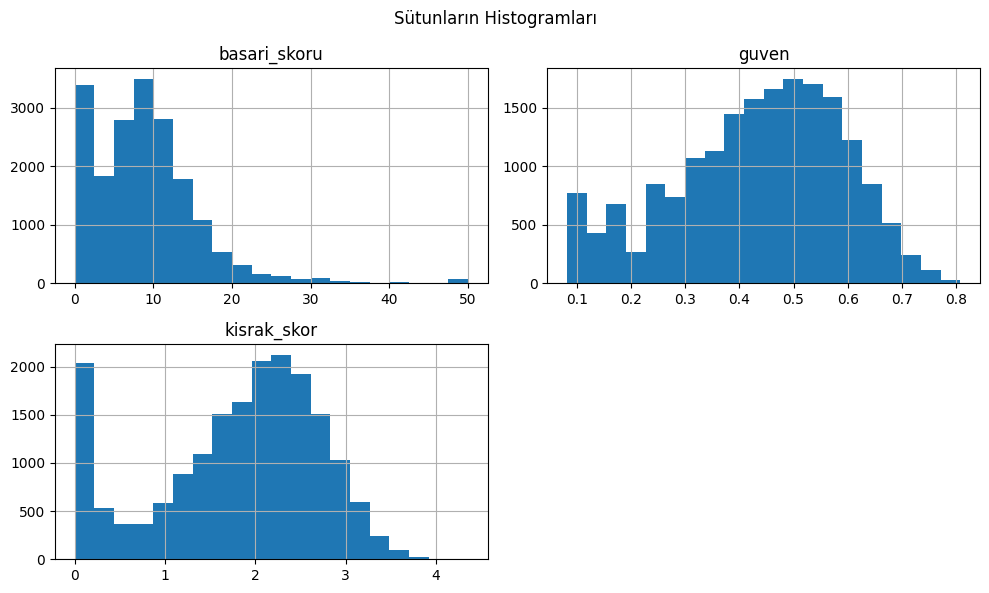

In [205]:
kisrak[["basari_skoru", "guven", "kisrak_skor"]].hist(bins=20, figsize=(10, 6))
plt.suptitle("Sütunların Histogramları")
plt.tight_layout()
plt.show()

In [206]:
kisrak_id = kisrak[["Kısrak", "kisrak_skor"]]

In [207]:
# Aynı isimde birden fazla jokey varsa, ortalama skorlarını alalım:
kisrak_id_unique = kisrak.groupby("Kısrak")["kisrak_skor"].mean().reset_index()

# Şimdi eşleştirme yapalım:
df["kisrak_skor"] = df["Orijin(Anne)"].map(kisrak_id_unique.set_index("Kısrak")["kisrak_skor"])

df.info

<bound method DataFrame.info of         Unnamed: 0  Sıra          At İsmi  Yaş Orijin(Baba)  Orijin(Anne)  \
5774           NaN     5        A BİENTOT    2    LAST EXIT     LA CIGALE   
5775           NaN    15        A BİENTOT    3    LAST EXIT     LA CIGALE   
5776           NaN    14        A BİENTOT    3    LAST EXIT     LA CIGALE   
5777           NaN    12        A BİENTOT    3    LAST EXIT     LA CIGALE   
5778           NaN     6        A BİENTOT    3    LAST EXIT     LA CIGALE   
...            ...   ...              ...  ...          ...           ...   
195540         NaN     3     ŞİRİNMİŞİRİN    8      UÇANBEY   KINALIGELİN   
195541         NaN     5     ŞİRİNMİŞİRİN    8      UÇANBEY   KINALIGELİN   
195542         NaN     7     ŞİRİNMİŞİRİN    8      UÇANBEY   KINALIGELİN   
195543         NaN     7  ŞİRİNYER PINARI    4      ANATOLY  VICTORY KISS   
195544         NaN     8  ŞİRİNYER PINARI    4      ANATOLY  VICTORY KISS   

             Kilo        Sahip Adı Antrenör Adı  St  ...  kariyer_ortalamasi  \
5774    57.000000    TRACY KAYAHAN          NaN   8  ...            5.000000   
5775    58.000000    TRACY KAYAHAN          NaN  17  ...           10.000000   
5776    58.000000    TRACY KAYAHAN          NaN  18  ...           11.333333   
5777    52.000000    TRACY KAYAHAN          NaN  12  ...           11.500000   
5778    58.000000    TRACY KAYAHAN          NaN  10  ...           10.400000   
...           ...              ...          ...  ..  ...                 ...   
195540  57.333333   MEHMET CANLIKA          NaN  11  ...            4.405405   
195541  56.950000   MEHMET CANLIKA          NaN  10  ...            4.421053   
195542  56.500000   MEHMET CANLIKA          NaN   1  ...            4.487179   
195543  50.000000  İSMAİL HADİOĞLU          NaN   3  ...            7.000000   
195544  50.200000  İSMAİL HADİOĞLU          NaN   2  ...            7.500000   

       son3_ilk3 performans_ivmesi agirlikli_ortalama  ay mevsim  jokey_skoru  \
5774    0.000000               NaN           5.000000 NaN    NaN     3.432936   
5775    0.000000               NaN          11.666667 NaN    NaN     2.562359   
5776    0.000000               NaN          12.833333 NaN    NaN     3.017831   
5777    0.000000          8.666667          12.500000 NaN    NaN     1.734865   
5778    0.000000          0.666667          10.333333 NaN    NaN     3.017831   
...          ...               ...                ...  ..    ...          ...   
195540  1.000000         -2.000000           4.112376 NaN    NaN     3.748531   
195541  0.666667          0.000000           4.157895 NaN    NaN     2.463632   
195542  0.333333          3.000000           4.300000 NaN    NaN     3.813987   
195543  0.000000               NaN           7.000000 NaN    NaN     2.251874   
195544  0.000000               NaN           7.666667 NaN    NaN     2.251874   

       sahip_skoru antrenor_skoru  kisrak_skor  
5774      2.937161       3.534031     2.210415  
5775      2.937161       3.534031     2.210415  
5776      2.937161       3.534031     2.210415  
5777      2.937161       3.534031     2.210415  
5778      2.937161       3.534031     2.210415  
...            ...            ...          ...  
195540    2.279720       3.000202     2.948891  
195541    2.279720       3.000202     2.948891  
195542    2.279720       3.000202     2.948891  
195543    3.287695       3.186119     2.785261  
195544    3.287695       3.186119     2.785261  

[195663 rows x 46 columns]>

In [208]:
dosya_yolu = "/content/drive/My Drive/aygir_set.csv"  # Örnek dosya adı
import pandas as pd
aygir = pd.read_csv(dosya_yolu)
aygir.head()  # Veriyi görüntüle

,Aygır,Ülke Adı,Irk Adı,Koşan Tay Adet,Kazanan Yavru Adet,Koşu,1.,2.,3.,4.,5.,1.%,2.%,3.%,4.%,5.%,Kazanç
0,KAIZBERT,RUSYA(A),Arap,524.0,349.0,16084.0,2323.0,1976.0,1633.0,1522.0,1443.0,14.0,12.0,10.0,9.0,9.0,"378.905.826,46"
1,TURBO,TÜRKİYE,Arap,618.0,448.0,15978.0,2035.0,1894.0,1679.0,1637.0,1520.0,13.0,12.0,11.0,10.0,10.0,"399.720.470,64"
2,VICTORY GALLOP,KANADA,İngiliz,648.0,409.0,15094.0,1915.0,1828.0,1862.0,1779.0,1636.0,13.0,12.0,12.0,12.0,11.0,"294.509.232,35"
3,KANEKO,TÜRKİYE,İngiliz,557.0,397.0,12968.0,1859.0,1632.0,1513.0,1358.0,1314.0,14.0,13.0,12.0,10.0,10.0,"246.745.415,04"
4,ROYAL ABJAR,ABD,İngiliz,475.0,322.0,13651.0,1673.0,1576.0,1450.0,1417.0,1405.0,12.0,12.0,11.0,10.0,10.0,"80.301.016,36"


In [209]:
aygir = aygir.dropna()

In [210]:
# Parantez içindeki ülke kısaltmalarını kaldır
aygir['Aygır'] = aygir['Aygır'].str.replace(r"\s*\(.*?\)", "", regex=True)

# Sondaki '*' karakterini kaldır
aygir['Aygır'] = aygir['Aygır'].str.rstrip('*')

In [211]:
df[df["Orijin(Baba)"].isin(aygir["Aygır"])!= True]

,Unnamed: 0,Sıra,At İsmi,Yaş,Orijin(Baba),Orijin(Anne),Kilo,Sahip Adı,Antrenör Adı,St,...,kariyer_ortalamasi,son3_ilk3,performans_ivmesi,agirlikli_ortalama,ay,mevsim,jokey_skoru,sahip_skoru,antrenor_skoru,kisrak_skor
1355,1399.0,6,ABAYKIZ,30,TAYKUT,BAHAR SULTAN,57.0,ALİ KAYA,A.ATAŞ,9,...,6.0,0.0,NaN,6.0,4.0,2.0,2.577894,2.012718,2.924484,0.000000
1884,1951.0,7,ADİL KAPTAN,40,OĞLUM EMRE BEY,NATALYA,58.0,DİLEK BURAN,SEN.GÖKÇE,7,...,7.0,0.0,NaN,7.0,4.0,2.0,1.011120,2.009187,2.984211,1.117840
433,450.0,2,ADİLE HANIM,30,FATİH AĞA,GÖNÜLGÜZELİ,57.0,MEHMET UÇAR,Y.UÇAR,7,...,2.0,1.0,NaN,2.0,4.0,2.0,2.470677,2.784477,2.877232,2.030142
1583,1639.0,2,AFRİKA KIZI,30,GÜMBÜRGÜMBÜR,DİLDE,57.0,MEHMET GARİP BECENE,V.ÇİZİK,3,...,2.0,1.0,NaN,2.0,4.0,2.0,1.370634,2.008006,2.949271,1.562500
2011,2081.0,2,AKGÜN AĞA,30,TAYKUT,KARKUŞU,57.0,MERTCAN ÖZKAN,Y.DEMİRKIRAN,4,...,2.0,1.0,NaN,2.0,4.0,2.0,4.040970,1.638229,3.530511,0.375186
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4986,5120.0,3,ÖZTUĞ,30,GÜMBÜRGÜMBÜR,IŞIL HANIM,57.0,FERAT ÖZKAN,ADN.POLAT,11,...,3.0,1.0,NaN,3.0,4.0,2.0,2.921511,2.424672,2.509224,1.703596
1529,1583.0,4,İNCİ GÜLÜM,30,DEDE SEYDO,CENGİZGÜLÜ,57.0,S.AHMET CENGİZ,F.BAKAY,8,...,4.0,0.0,NaN,4.0,4.0,2.0,3.579393,2.910882,2.599574,2.654722
156,164.0,3,İSAMİME,20,TILSIT,LADY DORA,55.8,HANNE NUR SAÇAN,T.O.KARA,2,...,3.0,1.0,NaN,3.0,4.0,2.0,3.877103,1.679159,2.099757,2.182681
240,254.0,8,ŞEMLAN,30,FATİH AĞA,ALTINBEBEK,57.0,YAKUP ÇELİK,S.KARAKEÇİLİ,1,...,8.0,0.0,NaN,8.0,4.0,2.0,2.931523,2.755484,2.877484,1.952140


In [212]:
import numpy as np

def hesapla_aygir_skoru(df):
    # Başarı skoru: yüzdeleri normalize edip ağırlık veriyoruz
    df["basari_skoru"] = (
        df["1.%"] * 0.5 +
        df["2.%"] * 0.3 +
        df["3.%"] * 0.15 +
        df["4.%"] * 0.04 +
        df["5.%"] * 0.01
    )

    # Güven skoru: Logaritmik normalizasyon
    df["guven"] = df["Koşu"].apply(lambda x: np.log1p(x) / np.log1p(5000))

    # Kısrak skoru: Başarı ve güvenin çarpımının karekökü
    df["aygir_skor"] = (df["basari_skoru"] * df["guven"]) ** 0.5

    return df

In [213]:
hesapla_aygir_skoru(aygir)

,Aygır,Ülke Adı,Irk Adı,Koşan Tay Adet,Kazanan Yavru Adet,Koşu,1.,2.,3.,4.,5.,1.%,2.%,3.%,4.%,5.%,Kazanç,basari_skoru,guven,aygir_skor
0,KAIZBERT,RUSYA(A),Arap,524.0,349.0,16084.0,2323.0,1976.0,1633.0,1522.0,1443.0,14.0,12.0,10.0,9.0,9.0,"378.905.826,46",12.55,1.137160,3.777746
1,TURBO,TÜRKİYE,Arap,618.0,448.0,15978.0,2035.0,1894.0,1679.0,1637.0,1520.0,13.0,12.0,11.0,10.0,10.0,"399.720.470,64",12.25,1.136384,3.731046
2,VICTORY GALLOP,KANADA,İngiliz,648.0,409.0,15094.0,1915.0,1828.0,1862.0,1779.0,1636.0,13.0,12.0,12.0,12.0,11.0,"294.509.232,35",12.49,1.129702,3.756326
3,KANEKO,TÜRKİYE,İngiliz,557.0,397.0,12968.0,1859.0,1632.0,1513.0,1358.0,1314.0,14.0,13.0,12.0,10.0,10.0,"246.745.415,04",13.20,1.111880,3.831033
4,ROYAL ABJAR,ABD,İngiliz,475.0,322.0,13651.0,1673.0,1576.0,1450.0,1417.0,1405.0,12.0,12.0,11.0,10.0,10.0,"80.301.016,36",11.75,1.117906,3.624278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3618,GIRVIN,ABD,İngiliz,1.0,0.0,7.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,14.0,29.0,14.0,"161.800,00",3.40,0.244141,0.911086
3619,VINO RUSSO,ABD,İngiliz,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,",00",0.00,0.128985,0.000000
3621,KING OF CHANGE,İNGİLTERE,İngiliz,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,100.0,"18.400,00",1.00,0.081380,0.285272
3622,HAVANA GREY,İNGİLTERE,İngiliz,1.0,0.0,15.0,0.0,1.0,1.0,1.0,3.0,0.0,7.0,7.0,7.0,20.0,"142.887,50",3.63,0.325521,1.087033


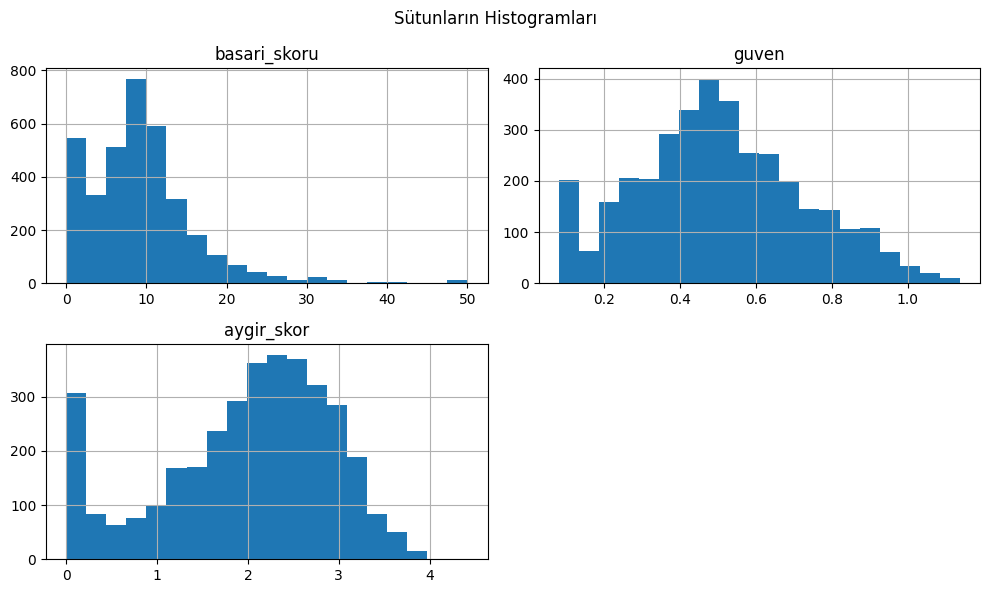

In [214]:
aygir[["basari_skoru", "guven", "aygir_skor"]].hist(bins=20, figsize=(10, 6))
plt.suptitle("Sütunların Histogramları")
plt.tight_layout()
plt.show()

In [215]:
aygir_id = aygir[["Aygır", "aygir_skor"]]

In [216]:
# Aynı isimde birden fazla jokey varsa, ortalama skorlarını alalım:
aygir_id_unique = aygir.groupby("Aygır")["aygir_skor"].mean().reset_index()

# Şimdi eşleştirme yapalım:
df["aygir_skor"] = df["Orijin(Baba)"].map(aygir_id_unique.set_index("Aygır")["aygir_skor"])

print(df.info)

<bound method DataFrame.info of         Unnamed: 0  Sıra          At İsmi  Yaş Orijin(Baba)  Orijin(Anne)  \
5774           NaN     5        A BİENTOT    2    LAST EXIT     LA CIGALE   
5775           NaN    15        A BİENTOT    3    LAST EXIT     LA CIGALE   
5776           NaN    14        A BİENTOT    3    LAST EXIT     LA CIGALE   
5777           NaN    12        A BİENTOT    3    LAST EXIT     LA CIGALE   
5778           NaN     6        A BİENTOT    3    LAST EXIT     LA CIGALE   
...            ...   ...              ...  ...          ...           ...   
195540         NaN     3     ŞİRİNMİŞİRİN    8      UÇANBEY   KINALIGELİN   
195541         NaN     5     ŞİRİNMİŞİRİN    8      UÇANBEY   KINALIGELİN   
195542         NaN     7     ŞİRİNMİŞİRİN    8      UÇANBEY   KINALIGELİN   
195543         NaN     7  ŞİRİNYER PINARI    4      ANATOLY  VICTORY KISS   
195544         NaN     8  ŞİRİNYER PINARI    4      ANATOLY  VICTORY KISS   

             Kilo        Sahip Adı Antrenör

In [217]:
# Hepsini birleştirip Yarış ID üretelim
df["Yarış_ID"] = (df["Tarih"].astype(str) + "_" + df["Şehir"].astype(str) + "_" + df["Koşu"].astype(str)).astype('category').cat.codes

In [220]:
k = df[df["Yarış_ID"].isna() != True]
k.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195663 entries, 5774 to 195544
Data columns (total 48 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Unnamed: 0          5892 non-null    float64       
 1   Sıra                195663 non-null  int64         
 2   At İsmi             195663 non-null  object        
 3   Yaş                 195663 non-null  int64         
 4   Orijin(Baba)        195663 non-null  object        
 5   Orijin(Anne)        195663 non-null  object        
 6   Kilo                195663 non-null  float64       
 7   Sahip Adı           195663 non-null  object        
 8   Antrenör Adı        5892 non-null    object        
 9   St                  195663 non-null  int64         
 10  H                   195663 non-null  float64       
 11  Derece              195663 non-null  object        
 12  Detaylar            5788 non-null    object        
 13  Jokey               195663 non-

In [222]:
# Tekrarlayan satır var mı?
tekrar_var_mi = df.duplicated().any()

# Kaç tane tekrarlayan satır var?
tekrar_sayisi = df.duplicated().sum()

print(f"Tekrarlayan satır var mı? {tekrar_var_mi}")
print(f"Tekrarlayan satır sayısı: {tekrar_sayisi}")

Tekrarlayan satır var mı? True
Tekrarlayan satır sayısı: 93


In [228]:
df_sonuclar

,Unnamed: 0,Sıra,At İsmi,Yaş,Orijin(Baba),Orijin(Anne),Kilo,Sahip Adı,Antrenör Adı,St,...,performans_ivmesi,agirlikli_ortalama,ay,mevsim,jokey_skoru,sahip_skoru,antrenor_skoru,kisrak_skor,aygir_skor,Yarış_ID
51,859.0,12,ABAY HANIM,40,SONALP,UÇANAY,52.7,SERAY ÜNBAY,E.USLU,8,...,NaN,12.000000,4.0,2.0,2.774546,2.087917,3.282096,2.054045,3.077396,0
62,1399.0,6,ABAYKIZ,30,TAYKUT,BAHAR SULTAN,57.0,ALİ KAYA,A.ATAŞ,9,...,NaN,6.000000,4.0,2.0,2.577894,2.012718,2.924484,0.000000,NaN,0
83,3364.0,5,ABDÜL,40,TOROK,ELEVATO,55.8,ÇAVUŞ DURAN,HAS.ALTUNBAŞ,2,...,NaN,7.000000,4.0,2.0,2.764053,2.103411,3.107636,3.003694,3.706180,0
354,5840.0,10,ABİDE MİNE,40,CRIMEAN TATAR,SPRING FIRE,52.0,ŞAHİN SEKİN,Ü.AYBOĞA,7,...,NaN,8.333333,4.0,2.0,1.840256,1.999715,2.424840,1.729400,2.863896,0
722,2273.0,2,ADA IN MY HEART,20,SUPER ALP,NO WOMAN NO CRY,55.0,AHMET YILANCIK,G.BALTA,4,...,NaN,2.000000,4.0,2.0,2.265133,1.531726,2.977474,1.948004,0.676562,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193579,2272.0,1,ŞANS,20,LION KING,HOLLY HOLIDAY,56.8,İDRİS ÜNLÜ,İBR.DEMİR,1,...,NaN,1.000000,4.0,2.0,3.748531,2.143145,2.175288,0.571348,2.223889,0
193764,756.0,9,ŞANVERDİ,80,KAIZBERT,BERNASULTAN,56.5,CAN SALİH TAVUKCU,T.YILMAZ,10,...,NaN,9.000000,4.0,2.0,4.193813,2.571703,2.902883,2.664426,3.777746,0
193953,3133.0,6,ŞEF ÇELİK,30,MARCAVELLY,SEVMEK ZAMANI,53.0,SABRİ ALTIN,A.TEMİZER,5,...,NaN,6.000000,4.0,2.0,2.127266,2.557700,3.166799,0.000000,3.314224,0
194302,3055.0,4,ŞELALE TAY,40,ALTINCI HİS,YALDIZ,58.0,MURAT BEKMEZCİ,U.KULAK,11,...,NaN,3.666667,4.0,2.0,3.981666,2.768194,3.150840,2.001872,2.349264,0


from matplotlib import pyplot as plt
df_sonuclar['Unnamed: 0'].plot(kind='hist', bins=20, title='Unnamed: 0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_sonuclar['Sıra'].plot(kind='hist', bins=20, title='Sıra')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_sonuclar['Yaş'].plot(kind='hist', bins=20, title='Yaş')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_sonuclar['Kilo'].plot(kind='hist', bins=20, title='Kilo')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df_sonuclar.groupby('Pist').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_sonuclar.plot(kind='scatter', x='Unnamed: 0', y='Sıra', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_sonuclar.plot(kind='scatter', x='Sıra', y='Yaş', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_sonuclar.plot(kind='scatter', x='Yaş', y='Kilo', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_sonuclar.plot(kind='scatter', x='Kilo', y='St', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Koşu']
  ys = series['Unnamed: 0']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_sonuclar.sort_values('Koşu', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Pist')):
  _plot_series(series, series_name, i)
  fig.legend(title='Pist', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Koşu')
_ = plt.ylabel('Unnamed: 0')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Koşu']
  ys = series['Sıra']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_sonuclar.sort_values('Koşu', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Pist')):
  _plot_series(series, series_name, i)
  fig.legend(title='Pist', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Koşu')
_ = plt.ylabel('Sıra')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Koşu']
  ys = series['Yaş']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_sonuclar.sort_values('Koşu', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Pist')):
  _plot_series(series, series_name, i)
  fig.legend(title='Pist', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Koşu')
_ = plt.ylabel('Yaş')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Koşu']
  ys = series['Kilo']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_sonuclar.sort_values('Koşu', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Pist')):
  _plot_series(series, series_name, i)
  fig.legend(title='Pist', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Koşu')
_ = plt.ylabel('Kilo')

from matplotlib import pyplot as plt
df_sonuclar['Unnamed: 0'].plot(kind='line', figsize=(8, 4), title='Unnamed: 0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_sonuclar['Sıra'].plot(kind='line', figsize=(8, 4), title='Sıra')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_sonuclar['Yaş'].plot(kind='line', figsize=(8, 4), title='Yaş')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_sonuclar['Kilo'].plot(kind='line', figsize=(8, 4), title='Kilo')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_sonuclar['Pist'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_sonuclar, x='Unnamed: 0', y='Pist', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_sonuclar['Pist'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_sonuclar, x='Sıra', y='Pist', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_sonuclar['Pist'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_sonuclar, x='Yaş', y='Pist', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_sonuclar['Pist'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_sonuclar, x='Kilo', y='Pist', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [226]:
# Hedef at isimleri
at_isimleri = [
    "LADY NORTH", "THUNDER JEST", "GEL KIZIM", "MARGİN CALL",
    "PEHLİVAN KIZIM", "ALMANYALI KIZ", "QUBIT", "KIZIL GÖLGE",
    "MARIE CURIE", "RAGAZZA NERA"
]

# Bu atların bulunduğu Koşu'ları filtrele
kosu_gruplari = df[df["At İsmi"].isin(at_isimleri)].groupby("Koşu")["At İsmi"].nunique()

# Hepsi aynı koşuda varsa, 10 farklı at ismi olmalı
hedef_kosular = kosu_gruplari[kosu_gruplari == len(at_isimleri)].index.tolist()

# O koşuların tüm satırlarını alalım
df_sonuclar = df[df["Koşu"].isin(hedef_kosular)]

# Sonuçları göster
print(df_sonuclar)

        Unnamed: 0  Sıra          At İsmi  Yaş   Orijin(Baba)  \
51           859.0    12       ABAY HANIM   40         SONALP   
62          1399.0     6          ABAYKIZ   30         TAYKUT   
83          3364.0     5            ABDÜL   40          TOROK   
354         5840.0    10       ABİDE MİNE   40  CRIMEAN TATAR   
722         2273.0     2  ADA IN MY HEART   20      SUPER ALP   
...            ...   ...              ...  ...            ...   
193579      2272.0     1             ŞANS   20      LION KING   
193764       756.0     9         ŞANVERDİ   80       KAIZBERT   
193953      3133.0     6        ŞEF ÇELİK   30     MARCAVELLY   
194302      3055.0     4       ŞELALE TAY   40    ALTINCI HİS   
195451      3965.0     3     ŞİRİN SERHAN   40      SERHANTAY   

           Orijin(Anne)  Kilo          Sahip Adı  Antrenör Adı  St  ...  \
51               UÇANAY  52.7        SERAY ÜNBAY        E.USLU   8  ...   
62         BAHAR SULTAN  57.0           ALİ KAYA        A.ATAŞ   9  .

In [93]:
# Object tipinde olan sütunları listele
object_columns = df.select_dtypes(include="object").columns

print(object_columns)

Index(['At İsmi', 'Orijin(Baba)', 'Orijin(Anne)', 'Sahip Adı', 'Antrenör Adı',
       'Derece', 'Detaylar', 'Jokey', 'Antrenör', 'Şehir', 'Pist'],
      dtype='object')


In [94]:
# İstenmeyen sütunları listeleyelim
silinecek_sutunlar = ['Orijin(Baba)', 'Orijin(Anne)', 'Sahip Adı', 'Jokey', 'Antrenör']

# Bu sütunları df'den düşürelim
df = df.drop(columns=silinecek_sutunlar)

# Kontrol edelim
print(df.head())

      Unnamed: 0  Sıra    At İsmi  Yaş  Kilo Antrenör Adı  St     H   Derece  \
5774         NaN     5  A BİENTOT    2  57.0          NaN   8   0.0  0.49.40   
5775         NaN    15  A BİENTOT    3  58.0          NaN  17   0.0  1.31.05   
5776         NaN    14  A BİENTOT    3  58.0          NaN  18   0.0  1.41.76   
5777         NaN    12  A BİENTOT    3  52.0          NaN  12  20.0  1.33.64   
5778         NaN     6  A BİENTOT    3  58.0          NaN  10  20.0  1.27.52   

     Detaylar  ... performans_ivmesi  agirlikli_ortalama  ay mevsim  \
5774      NaN  ...               NaN            5.000000 NaN    NaN   
5775      NaN  ...               NaN           11.666667 NaN    NaN   
5776      NaN  ...               NaN           12.833333 NaN    NaN   
5777      NaN  ...          8.666667           12.500000 NaN    NaN   
5778      NaN  ...          0.666667           10.333333 NaN    NaN   

      jokey_skoru  sahip_skoru  antrenor_skoru  kisrak_skor  aygir_skor  \
5774     3.432936

In [95]:
df = pd.get_dummies(df, columns=["Şehir", "Pist"], prefix=["sehir", "pist"])

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195663 entries, 5774 to 195544
Data columns (total 54 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Unnamed: 0          5892 non-null    float64       
 1   Sıra                195663 non-null  int64         
 2   At İsmi             195663 non-null  object        
 3   Yaş                 195663 non-null  int64         
 4   Kilo                195663 non-null  float64       
 5   Antrenör Adı        5892 non-null    object        
 6   St                  195663 non-null  int64         
 7   H                   195663 non-null  float64       
 8   Derece              195663 non-null  object        
 9   Detaylar            5788 non-null    object        
 10  Tarih               5892 non-null    datetime64[ns]
 11  Koşu                5892 non-null    float64       
 12  Ekipman_KG          195663 non-null  int64         
 13  Ekipman_KUL         195663 non-

In [97]:
# At isimlerine benzersiz bir ID veriyoruz
df["At_ID"] = df["At İsmi"].astype('category').cat.codes

In [98]:
# ID - İsim eşleşmesi için ayrı bir tablo
at_id_map = df[["At_ID", "At İsmi"]].drop_duplicates().reset_index(drop=True)

In [1]:
df = df.drop(columns=["At İsmi"])

NameError: name 'df' is not defined

In [100]:
df = df.drop(columns=["Derece"])

In [101]:
df = df.drop(columns=["Tarih"])

In [102]:
df['performans_ivmesi'] = df['performans_ivmesi'].fillna(0.1)  # Varsayılan hafif pozitif ivme

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195663 entries, 5774 to 195544
Data columns (total 52 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          5892 non-null    float64
 1   Sıra                195663 non-null  int64  
 2   Yaş                 195663 non-null  int64  
 3   Kilo                195663 non-null  float64
 4   Antrenör Adı        5892 non-null    object 
 5   St                  195663 non-null  int64  
 6   H                   195663 non-null  float64
 7   Detaylar            5788 non-null    object 
 8   Koşu                5892 non-null    float64
 9   Ekipman_KG          195663 non-null  int64  
 10  Ekipman_KUL         195663 non-null  int64  
 11  Ekipman_DB          195663 non-null  int64  
 12  Ekipman_BB          195663 non-null  int64  
 13  Ekipman_ÇABA        195663 non-null  int64  
 14  Ekipman_GKR         195663 non-null  int64  
 15  Ekipman_SKG         195663 non-null 

In [104]:
df = df.drop(columns=['Antrenör Adı', 'Detaylar'])

In [105]:
YARIŞLAR = df

In [106]:
dosya_yolu = '/content/drive/MyDrive/tahminler.csv'
YARIŞLAR.to_csv(dosya_yolu, index=False)

In [107]:
################# MODELLEME ###########

In [108]:
from sklearn.model_selection import GroupShuffleSplit

# %80 train, %20 test (yarışlar bağımsız kalacak şekilde)
splitter = GroupShuffleSplit(test_size=0.2, n_splits=1, random_state=42)
train_idx, test_idx = next(splitter.split(df, groups=df['Yarış_ID']))

train_df = df.iloc[train_idx]
test_df = df.iloc[test_idx]

# Kontrol
print(f"Toplam yarış sayısı: {df['Yarış_ID'].nunique()}")
print(f"Train yarış sayısı: {train_df['Yarış_ID'].nunique()}")
print(f"Test yarış sayısı: {test_df['Yarış_ID'].nunique()}")

Toplam yarış sayısı: 20
Train yarış sayısı: 16
Test yarış sayısı: 4


In [109]:
# Train ve Test'teki yarış ID'leri
train_yarislar = set(train_df['Yarış_ID'])
test_yarislar = set(test_df['Yarış_ID'])

# Kesişim bulalım
kesisim = train_yarislar.intersection(test_yarislar)

# Sonuç
if len(kesisim) == 0:
    print("✅ Hiçbir yarış hem train hem testte yok, ayırma doğru!")
else:
    print(f"⚠️ {len(kesisim)} yarış hem train hem test setinde var!")
    print("Çakışan Yarış_ID'ler:", kesisim)

✅ Hiçbir yarış hem train hem testte yok, ayırma doğru!


In [110]:
from sklearn.model_selection import TimeSeriesSplit

# Yarış ID'lerini sıralı şekilde bölelim
tscv = TimeSeriesSplit(n_splits=5)
for fold, (train_idx, val_idx) in enumerate(tscv.split(np.sort(df['Yarış_ID'].unique()))):
    train_races = np.sort(df['Yarış_ID'].unique())[train_idx]
    val_races = np.sort(df['Yarış_ID'].unique())[val_idx]

    print(f"\nFold {fold+1}:")
    print(f"Train yarış aralığı: {train_races.min()} - {train_races.max()}")
    print(f"Val yarış aralığı: {val_races.min()} - {val_races.max()}")


Fold 1:
Train yarış aralığı: 0 - 4
Val yarış aralığı: 5 - 7

Fold 2:
Train yarış aralığı: 0 - 7
Val yarış aralığı: 8 - 10

Fold 3:
Train yarış aralığı: 0 - 10
Val yarış aralığı: 11 - 13

Fold 4:
Train yarış aralığı: 0 - 13
Val yarış aralığı: 14 - 16

Fold 5:
Train yarış aralığı: 0 - 16
Val yarış aralığı: 17 - 19


In [111]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Özellikler ve hedef
X_train = train_df.drop(['Sıra', 'Yarış_ID'], axis=1)
y_train = train_df['Sıra']
X_test = test_df.drop(['Sıra', 'Yarış_ID'], axis=1)
y_test = test_df['Sıra']

# Model
model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=200,
    max_depth=5,
    learning_rate=0.05,
    early_stopping_rounds=10,
    random_state=42
)



In [112]:
# Eğitim
model.fit(X_train, y_train,
          eval_set=[(X_test, y_test)],
          verbose=True)

# Değerlendirme
test_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, test_pred)
print(f"\nTest MAE: {mae:.2f}")

# Yarış bazlı hatalar
test_df['tahmin'] = test_pred
race_errors = test_df.groupby('Yarış_ID').apply(lambda x: mean_absolute_error(x['Sıra'], x['tahmin']))
print("\nYarış bazlı hatalar:")
print(race_errors.describe())

[0]	validation_0-rmse:3.27317
[1]	validation_0-rmse:3.18178
[2]	validation_0-rmse:3.09512
[3]	validation_0-rmse:3.01517
[4]	validation_0-rmse:2.94051
[5]	validation_0-rmse:2.87116
[6]	validation_0-rmse:2.80612
[7]	validation_0-rmse:2.74432
[8]	validation_0-rmse:2.68641
[9]	validation_0-rmse:2.63400
[10]	validation_0-rmse:2.58525
[11]	validation_0-rmse:2.53857
[12]	validation_0-rmse:2.49431
[13]	validation_0-rmse:2.45319
[14]	validation_0-rmse:2.41553
[15]	validation_0-rmse:2.38021
[16]	validation_0-rmse:2.34704
[17]	validation_0-rmse:2.31663
[18]	validation_0-rmse:2.28827
[19]	validation_0-rmse:2.26127
[20]	validation_0-rmse:2.23689
[21]	validation_0-rmse:2.21318
[22]	validation_0-rmse:2.19147
[23]	validation_0-rmse:2.17156
[24]	validation_0-rmse:2.15304
[25]	validation_0-rmse:2.13576
[26]	validation_0-rmse:2.11935
[27]	validation_0-rmse:2.10440
[28]	validation_0-rmse:2.08966
[29]	validation_0-rmse:2.07607
[30]	validation_0-rmse:2.06355
[31]	validation_0-rmse:2.05129
[32]	validation_0-

<ipython-input-112-bafbb873b9a2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['tahmin'] = test_pred
<ipython-input-112-bafbb873b9a2>:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  race_errors = test_df.groupby('Yarış_ID').apply(lambda x: mean_absolute_error(x['Sıra'], x['tahmin']))


In [113]:
# Gerçek ve tahmin değerlerini karşılaştıran bir DataFrame
comparison_df = test_df[["Yarış_ID", "At_ID", "Sıra", "tahmin"]].copy()

# Tahmini sırayı yuvarlayabiliriz istersen (tam sayı gibi görmek için)
comparison_df["tahmin_sira"] = comparison_df["tahmin"].round()

# İstersen sapmayı da ekleyebiliriz
comparison_df["hata"] = (comparison_df["Sıra"] - comparison_df["tahmin"]).abs()

# İlk birkaç satıra bakalım
print(comparison_df.head())

      Yarış_ID  At_ID  Sıra     tahmin  tahmin_sira      hata
5774        17      0     5   4.932970          5.0  0.067030
5775        17      0    15  13.643487         14.0  1.356513
5776        17      0    14  12.615885         13.0  1.384115
5777        17      0    12  13.947009         14.0  1.947009
5778        17      0     6  10.467254         10.0  4.467254


In [114]:
comparison_df

,Yarış_ID,At_ID,Sıra,tahmin,tahmin_sira,hata
5774,17,0,5,4.932970,5.0,0.067030
5775,17,0,15,13.643487,14.0,1.356513
5776,17,0,14,12.615885,13.0,1.384115
5777,17,0,12,13.947009,14.0,1.947009
5778,17,0,6,10.467254,10.0,4.467254
...,...,...,...,...,...,...
195514,15,13607,4,3.451012,3.0,0.548988
195519,17,13607,4,3.400705,3.0,0.599295
195524,17,13607,8,8.138798,8.0,0.138798
195530,17,13607,4,3.446766,3.0,0.553234


In [115]:
comparison_df[comparison_df["Sıra"]- comparison_df["tahmin_sira"] <=1 ]

,Yarış_ID,At_ID,Sıra,tahmin,tahmin_sira,hata
5774,17,0,5,4.932970,5.0,0.067030
5775,17,0,15,13.643487,14.0,1.356513
5776,17,0,14,12.615885,13.0,1.384115
5777,17,0,12,13.947009,14.0,1.947009
5778,17,0,6,10.467254,10.0,4.467254
...,...,...,...,...,...,...
195514,15,13607,4,3.451012,3.0,0.548988
195519,17,13607,4,3.400705,3.0,0.599295
195524,17,13607,8,8.138798,8.0,0.138798
195530,17,13607,4,3.446766,3.0,0.553234


In [116]:
sira_tam_bilme_oran = (comparison_df["Sıra"] == comparison_df["tahmin_sira"]).mean()
print(f"➔ Sırayı tam bilme oranı: {sira_tam_bilme_oran:.2%}")

➔ Sırayı tam bilme oranı: 33.06%


In [117]:
sira_1_farkla_bilme_oran = (comparison_df["Sıra"] - comparison_df["tahmin_sira"] <= 1).mean()
print(f"➔ Sırayı 1 farkla bilme oranı: {sira_tam_bilme_oran:.2%}")

➔ Sırayı 1 farkla bilme oranı: 33.06%


In [118]:
yarisi_tam_bilme_oran = (
    comparison_df.groupby("Yarış_ID")
    .apply(lambda x: (x["Sıra"] == x["tahmin_sira"]).all())
    .mean()
)
print(f"➔ Tüm yarışı tamamen doğru bilme oranı: {yarisi_tam_bilme_oran:.2%}")

➔ Tüm yarışı tamamen doğru bilme oranı: 0.00%


<ipython-input-118-85220672602e>:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x["Sıra"] == x["tahmin_sira"]).all())


In [119]:
def ilk_iki_sirasiz(grup):
    gercek_ilk_iki = grup.sort_values("Sıra").head(2)["At_ID"].tolist()
    tahmin_ilk_iki = grup.sort_values("tahmin").head(2)["At_ID"].tolist()
    return len(set(gercek_ilk_iki) & set(tahmin_ilk_iki)) == 2

ilk_iki_sirasiz_oran = comparison_df.groupby("Yarış_ID").apply(ilk_iki_sirasiz).mean()
print(f"➔ İlk 2 atı sırasız doğru bilme oranı: {ilk_iki_sirasiz_oran:.2%}")

➔ İlk 2 atı sırasız doğru bilme oranı: 0.00%


<ipython-input-119-dfa502f71989>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ilk_iki_sirasiz_oran = comparison_df.groupby("Yarış_ID").apply(ilk_iki_sirasiz).mean()


In [120]:
def birinciyi_bilme(grup):
    gercek_birinci = grup.loc[grup["Sıra"].idxmin(), "At_ID"]
    tahmin_birinci = grup.loc[grup["tahmin"].idxmin(), "At_ID"]
    return gercek_birinci == tahmin_birinci

birinciyi_bilme_oran = comparison_df.groupby("Yarış_ID").apply(birinciyi_bilme).mean()
print(f"➔ Birinciyi doğru bilme oranı: {birinciyi_bilme_oran:.2%}")

➔ Birinciyi doğru bilme oranı: 0.00%


<ipython-input-120-2af1385b66f9>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  birinciyi_bilme_oran = comparison_df.groupby("Yarış_ID").apply(birinciyi_bilme).mean()


In [121]:
import shap

# SHAP değerlerini hesapla
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_train)

# SHAP summary plot
shap.summary_plot(shap_values, X_train)

KeyboardInterrupt: 

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195663 entries, 5774 to 195544
Data columns (total 50 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          5892 non-null    float64
 1   Sıra                195663 non-null  int64  
 2   Yaş                 195663 non-null  int64  
 3   Kilo                195663 non-null  float64
 4   St                  195663 non-null  int64  
 5   H                   195663 non-null  float64
 6   Koşu                5892 non-null    float64
 7   Ekipman_KG          195663 non-null  int64  
 8   Ekipman_KUL         195663 non-null  int64  
 9   Ekipman_DB          195663 non-null  int64  
 10  Ekipman_BB          195663 non-null  int64  
 11  Ekipman_ÇABA        195663 non-null  int64  
 12  Ekipman_GKR         195663 non-null  int64  
 13  Ekipman_SKG         195663 non-null  int64  
 14  Ekipman_SKUL        195663 non-null  int64  
 15  Ekipman_SGKR        195663 non-null 

In [124]:
df["Yarış_ID"].unique()

array([17, 13, 11, 16, 18, 10, 19, 12,  0,  1,  7,  6,  5,  9,  3,  2, 15,
       14,  4,  8], dtype=int8)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195663 entries, 5774 to 195544
Data columns (total 50 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          5892 non-null    float64
 1   Sıra                195663 non-null  int64  
 2   Yaş                 195663 non-null  int64  
 3   Kilo                195663 non-null  float64
 4   St                  195663 non-null  int64  
 5   H                   195663 non-null  float64
 6   Koşu                5892 non-null    float64
 7   Ekipman_KG          195663 non-null  int64  
 8   Ekipman_KUL         195663 non-null  int64  
 9   Ekipman_DB          195663 non-null  int64  
 10  Ekipman_BB          195663 non-null  int64  
 11  Ekipman_ÇABA        195663 non-null  int64  
 12  Ekipman_GKR         195663 non-null  int64  
 13  Ekipman_SKG         195663 non-null  int64  
 14  Ekipman_SKUL        195663 non-null  int64  
 15  Ekipman_SGKR        195663 non-null 

In [131]:
X_test[X_test["Koşu"].isna() != True ]

,Unnamed: 0,Yaş,Kilo,St,H,Koşu,Ekipman_KG,Ekipman_KUL,Ekipman_DB,Ekipman_BB,...,sehir_Diyarbakır,sehir_Elazığ,sehir_Kocaeli,sehir_İstanbul,sehir_İzmir,sehir_Şanlıurfa,pist_Kum,pist_Sentetik,pist_Çim,At_ID
833,859.0,40,52.7,8,36.0,1.0,0,0,1,0,...,False,False,False,False,True,False,False,True,False,6
1441,1494.0,40,51.0,12,36.0,10.0,0,0,1,0,...,False,False,False,False,True,False,True,False,False,6
1355,1399.0,30,57.0,9,0.0,1.0,1,0,0,0,...,False,False,False,False,True,False,True,False,False,7
3274,3364.0,40,55.8,2,70.0,1.0,0,0,1,0,...,False,False,False,False,True,False,False,True,False,10
5694,5840.0,40,52.0,7,29.0,1.0,1,0,1,0,...,False,False,False,False,True,False,True,False,False,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,756.0,80,56.5,10,97.0,1.0,0,0,0,0,...,False,False,False,False,True,False,False,False,True,13482
3045,3133.0,30,53.0,5,12.0,1.0,1,0,1,0,...,False,False,False,False,True,False,True,False,False,13497
2967,3055.0,40,58.0,11,34.0,1.0,1,0,1,0,...,False,False,False,False,True,False,False,False,True,13524
429,446.0,30,56.0,5,0.0,10.0,0,0,0,0,...,False,False,False,False,True,False,False,False,True,13558
